## Advance Regression Assignment by Dipak Sah 

# *Problem Statement*

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file. 

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# *Business Goal*

It is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Solution Approach

1. Reading and Understanding the data.
2. Data Cleaning.
3. Data Preparation.
4. Regression Model building and evalation of these models. 
5. Observations and conclusions.

#### 1. Reading and Understanding the data 

In [1]:
# Importing all the necessary libraries needed for this solution 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
# to hide warnings 
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',90)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
# reading the housing dataset 
housing = pd.read_csv('train.csv')
# glancing few records to see data 
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
housing.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [4]:
# checking data and its data types 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# checking rows and columns 
housing.shape

(1460, 81)

#### 2. Data Cleaning

In [6]:
# the first column in the dataset is ID which is a serial number and is not useful for our model building so droping the same
housing.drop(columns=['Id'],axis=1,inplace=True)


In [7]:
# checking the size 
housing.shape

(1460, 80)

In [8]:
# now let us drop duplicate records if any 
housing.drop_duplicates(inplace=True)
housing.shape

(1460, 80)

In [9]:
# checking for null values in the dataset 
round(((housing.isnull().sum()[housing.isnull().sum() != 0.00])/len(housing)*100),2).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [10]:
round(((housing.isnull().sum()[housing.isnull().sum() != 0.00])/len(housing)*100),2).sort_values(ascending=False).index.values

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
       'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'Electrical'], dtype=object)

In [11]:
# On the basis of the data dictionary provided, we understand that below columns having NA/None indicates that these services are not available in the given house. 
# And unavailability of these services do impact the price of the house so it becomes important to replace them with None

# PoolQC has 99.52% data as NA so it does not make sense to have this columns and hence we are dropping this .

housing.drop(columns=['PoolQC'],axis=1,inplace=True)

# list of colums where we need to replace NA with None.

columns_having_NA = ['MiscFeature', 'Alley', 'Fence', 'MasVnrType',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

# Handling NA for above columns 

for cols in columns_having_NA:
    housing[cols].fillna('None',inplace=True)





In [12]:
# checking the left over NA columns 
# checking for null values in the dataset 
round(((housing.isnull().sum()[housing.isnull().sum() != 0.00])/len(housing)*100),2).sort_values(ascending=False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [13]:
# let us look at them one by one
# Handling LotFrontage
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
# LotFrontage: Linear feet of street connected to property. It is numeric value so for missing values , we can impute with median value . Note mean and median are very close .
housing['LotFrontage'].fillna(housing['LotFrontage'].median(),inplace=True)

In [15]:
# Handling GarageYrBlt
housing['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
# GarageYrBlt: Year garage was built . 
# We can impute with median for all missing value.
housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median(),inplace=True)


In [17]:
# Handling MasVnrArea
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [18]:
# MasVnrArea: Masonry veneer area in square feet
# We observe from above describe on the column that mean is 103 and median is 0. But we will go median to impute the missing value 
housing['MasVnrArea'].fillna(housing['MasVnrArea'].median(),inplace=True) 

In [19]:
# Handling Electrical
housing['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [20]:
housing['Electrical'].value_counts()


Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [21]:
housing['Electrical'].isnull().sum()


1

In [22]:
#From above stats, observation is that it has only one row have null value. We have 2 option , either we can drop this row/record or we can impute with most used value ie SBrkr

# let us impute with SBrkr ie mode of the column .

housing['Electrical'].fillna('SBrkr',inplace=True) 

In [23]:
# We have handled all the NA values but let us check once again to ensure that everything has been handled.
round(((housing.isnull().sum()[housing.isnull().sum() != 0.00])/len(housing)*100),2).sort_values(ascending=False)

Series([], dtype: float64)

In [24]:
# Above result confirms all the NA has been handled. 

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
# checking data and its data types obtained from above info .
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [27]:
# It looks good - all the numerical columns are defined either float or int and categorical columns are defined as object.

#### Group all numerical and categorical columns together for further analysis 

We also notice that below columns are actually categorical columns even though they have numerical values. 

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor


In [28]:
housing['OverallQual'] = housing['OverallQual'].astype('object')

In [29]:
housing['OverallCond'] = housing['OverallCond'].astype('object')

We have 4 year and month columns : 
1. YearBuilt: Original construction date
2. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
3. MoSold: Month Sold (MM)
4. YrSold: Year Sold (YYYY)
5. GarageYrBlt : Year Garage was built (YYYY) 

We can find the age of the house or property at the time of sell, by substracting YearBuilt from Yrsold . Like wise , we can also find if propperty/ house has been remodelled or some addition done. 

Similarly, we will find the age of the Garage at the time of sell by substracting GarageyrBlt from YrSold . 

We will use MoSold to understand in which month sales are more . Rest of the columns, we will drop after deriving the new columns. 


In [30]:
# Creating a new derived column called 'HouseAge'
housing['HouseAge'] = housing['YrSold'] - housing['YearBuilt']

In [31]:
# Creating a new derived column called 'GarageAge'
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt']

In [32]:
# derived Yes/No Flag to indicate if RemodAdd done or not 

In [33]:
conditions = [housing['YearRemodAdd'] > housing['YearBuilt']]
choices = ['Yes']
housing['RemodAdd_Done'] = np.select(conditions,choices,default='No')


In [34]:
# let us drop all  year columns 
housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True) 

In [35]:
# we still have MoSold , we will use it for EDA and then we will see if we have to drop this also before model building 

In [36]:
housing['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

Looking at the below details from dictionary on MSSubClass. This looks more as categorical variable rather than continous numerical variable . So let us convert this as object.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [37]:
# converting from Int to Object
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [38]:
# finding all the numerical columns 
numerical_cols = housing.select_dtypes(['float64','int64']).columns
housing[numerical_cols].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice  \
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  180921.195890   
std      55.757415    40.177307    496.123024     2.703626   79442.502883   
min       0.000000     0.000000      0.000000     1.000000   34900.000000   
25%       0.000000     0.000000      0.000000     5.000000  129975.000000   
50%       0.000000     0.000000      0.000000     6.000000  163000.000000   
75%       0.000000     0.000000      0.0000

In [39]:
housing[numerical_cols].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  \
0          0            0         0        0       2     208500         5   
1          0            0         0        0       5     181500        31   
2          0            0         0        0       9     223500         7   
3          0            0         0        0       2     140000        91   
4          0            0         0        0      12     250000         8   

   GarageAge  
0        5.0  
1       31.0  
2        7.0  
3        8.0  
4        8.0

In [40]:
# finding all the categorical columns 
categorical_cols = housing.select_dtypes(['object']).columns
housing[categorical_cols].describe()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count         1460     1460   1460  1460     1460        1460      1460   
unique          15        5      2     3        4           4         2   
top             20       RL   Pave  None      Reg         Lvl    AllPub   
freq           536     1151   1454  1369      925        1311      1459   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1460      1460         1460       1460       1460     1460   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq        1052      1382          225       1260       1445     1220   

       HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
count        1460         1460         1460      1460     1460        1460   
unique          8           10            9         6        8          15   
top        1Story            5            5     Gable  CompShg     VinylSd   
freq          726          397          821      1141     1434         515   

       Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
count         1460       1460      1460      1460       1460     1460   
unique          16          4         4         5          6        5   
top        VinylSd       None        TA        TA      PConc       TA   
freq           504        872       906      1282        647      649   

       BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
count      1460         1460         1460         1460    1460      1460   
unique        5            5            7            7       6         5   
top          TA           No          Unf          Unf    GasA        Ex   
freq       1311          953          430         1256    1428       741   

       CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
count        1460       1460        1460       1460        1460       1460   
unique          2          5           4          7           6          7   
top             Y      SBrkr          TA        Typ        None     Attchd   
freq         1365       1335         735       1360         690        870   

       GarageFinish GarageQual GarageCond PavedDrive Fence MiscFeature  \
count          1460       1460       1460       1460  1460        1460   
unique            4          6          6          3     5           5   
top             Unf         TA         TA          Y  None        None   
freq            605       1311       1326       1340  1179        1406   

       SaleType SaleCondition RemodAdd_Done  
count      1460          1460          1460  
unique        9             6             2  
top          WD        Normal            No  
freq       1267          1198           764

In [41]:
print('No of Numerical columns:',numerical_cols.shape)
print('No of Categorical columns:', categorical_cols.shape)

No of Numerical columns: (32,)
No of Categorical columns: (46,)


In [42]:
print('Numerical Columns')
print(numerical_cols)
print('Categorical Columns')
print(categorical_cols)

Numerical Columns
Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'HouseAge', 'GarageAge'],
      dtype='object')
Categorical Columns
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Heat

#### Let us perform EDA

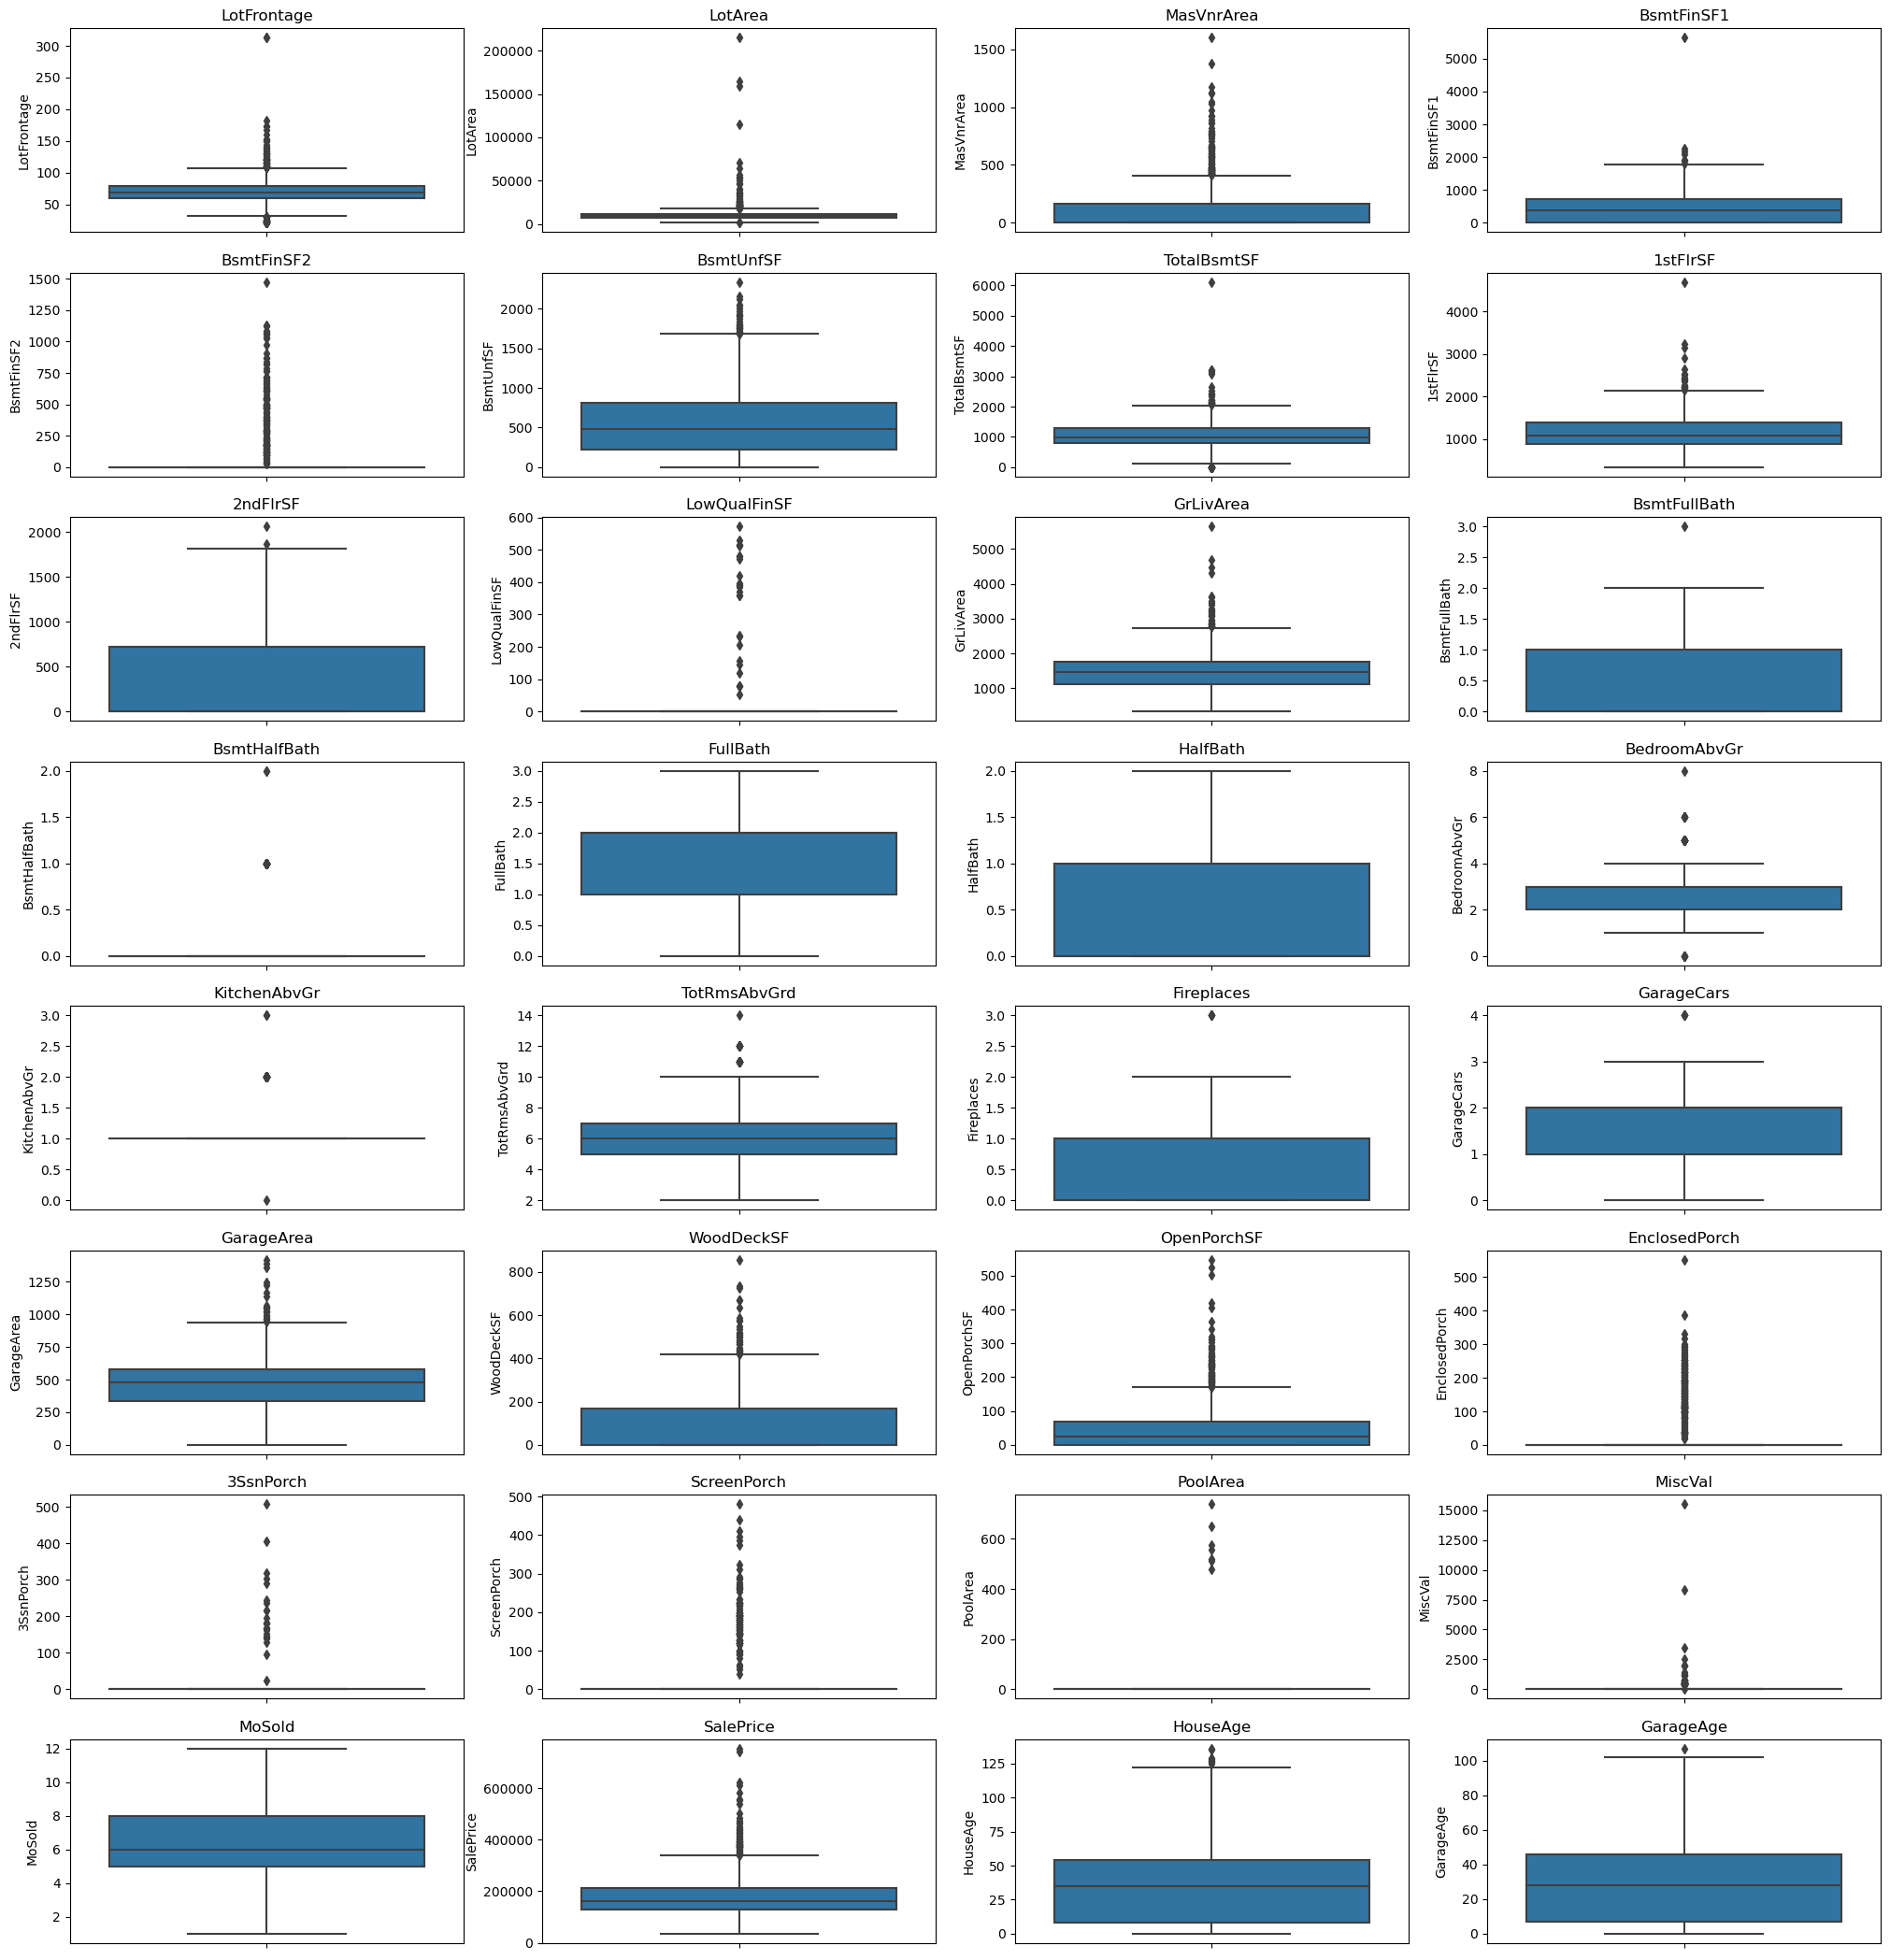

In [43]:
# Checking for outliers in the numerical columns 
# let us generate boxplot for all numerical columns 

plt.figure(figsize=(25,30))
for i in enumerate(numerical_cols):
    plt.subplot(9,4,1+i[0])
    sns.boxplot(y=housing[i[1]])
    plt.title(i[1])
plt.show()

In [44]:
#checking for outlier data in all the numerical columns Using Inter Quartile Range Technique

percentage_of_outliers = {}

for cols in numerical_cols:
    iqr = housing[cols].quantile(0.75) - housing[cols].quantile(0.25)
    count_of_outliers = housing[(housing[cols] > (housing[cols].quantile(0.75) + 1.5 *iqr)) | (housing[cols] < (housing[cols].quantile(0.25) - 1.5 *iqr))].shape[0]
    percentage_of_outliers[cols] =  round(count_of_outliers/housing[cols].shape[0]*100,2)


outlier_data = pd.DataFrame({'cols': list(percentage_of_outliers.keys()), 'Percentage' : list(percentage_of_outliers.values())})
outlier_data.sort_values('Percentage',ascending=False)


cols  Percentage
23  EnclosedPorch       14.25
4      BsmtFinSF2       11.44
25    ScreenPorch        7.95
0     LotFrontage        7.26
2      MasVnrArea        6.71
12   BsmtHalfBath        5.62
22    OpenPorchSF        5.27
1         LotArea        4.73
16   KitchenAbvGr        4.66
29      SalePrice        4.18
6     TotalBsmtSF        4.18
27        MiscVal        3.56
15   BedroomAbvGr        2.40
21     WoodDeckSF        2.19
10      GrLivArea        2.12
17   TotRmsAbvGrd        2.05
5       BsmtUnfSF        1.99
9    LowQualFinSF        1.78
24      3SsnPorch        1.64
20     GarageArea        1.44
7        1stFlrSF        1.37
30       HouseAge        0.55
3      BsmtFinSF1        0.48
26       PoolArea        0.48
19     GarageCars        0.34
18     Fireplaces        0.34
8        2ndFlrSF        0.14
11   BsmtFullBath        0.07
31      GarageAge        0.07
14       HalfBath        0.00
13       FullBath        0.00
28         MoSold        0.00

Looking at box plot and above outlier % of data , we have below observations

1. EnclosedPorch has highest no of outliers 
2. Most of the numerical columns have outlier in range of 1-14 % 
3. There are some with outliers below 1%
4. We have only 1460 rows so if we drop all the outliers, we may not good no of records for further analysis
5. We can use an approach of imputing either min/max value , mean or median. 
6. After doing google search, we feel it best to impute with min and max value(Obtained from IQR technique) for bottom and top outliers respecrtively
7. Target Variable SalePrice also has outlier but we will exclude this from imputation

In [45]:
# imputing ouliers 

for cols in numerical_cols:
    if cols!= 'SalePrice' :
        iqr = housing[cols].quantile(0.75) - housing[cols].quantile(0.25)
        maxval = housing[cols].quantile(0.75) + 1.5 *iqr   
        minval = housing[cols].quantile(0.25) - 1.5 *iqr
        housing[cols][housing[cols] > maxval] =  maxval
        housing[cols][housing[cols] < minval] =  minval
        

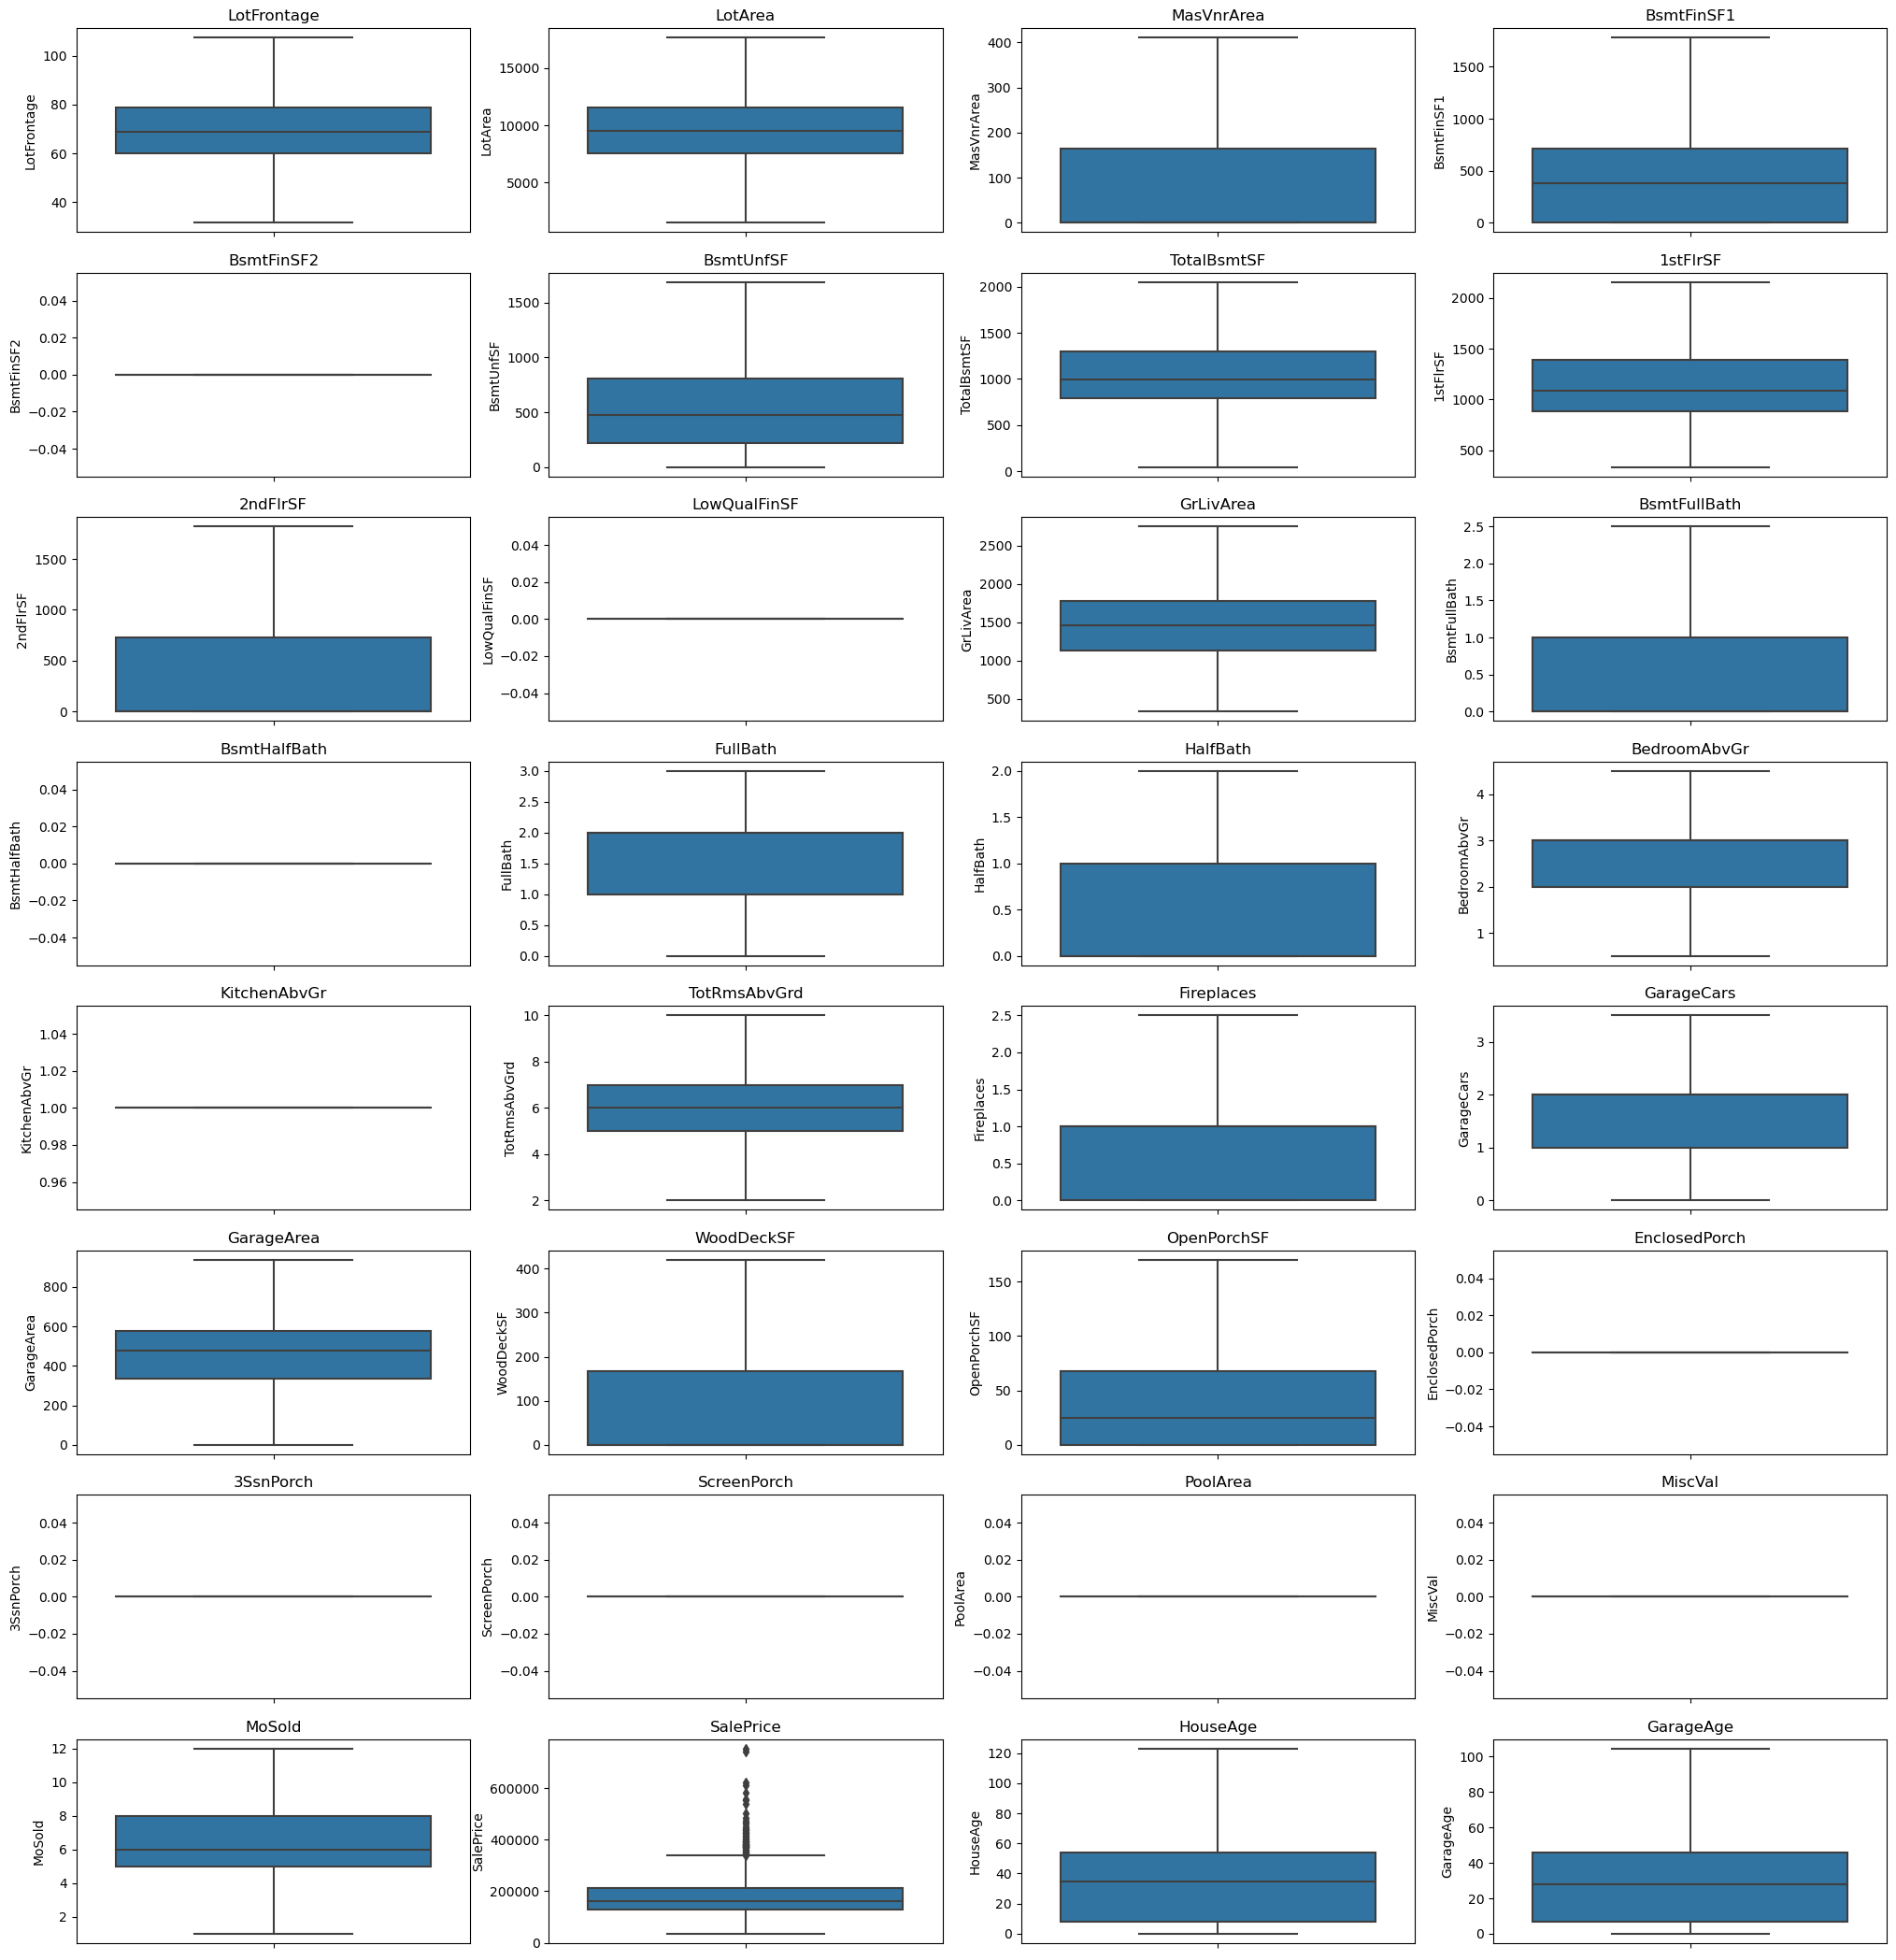

In [46]:
# checking the boxplot once again after handling the outlier using IQR technique 
plt.figure(figsize=(25,30))
for i in enumerate(numerical_cols):
    plt.subplot(9,4,1+i[0])
    sns.boxplot(y=housing[i[1]])
    plt.title(i[1])
plt.show()

- It looks good now
- SalePrice still have outliers, we did not treat this as it is our target variable

- Let us do analysis of continuous variables

In [47]:
# checking numerical columns 
housing[numerical_cols]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0   8450.0       196.0       706.0           0      150.0   
1            80.0   9600.0         0.0       978.0           0      284.0   
2            68.0  11250.0       162.0       486.0           0      434.0   
3            60.0   9550.0         0.0       216.0           0      540.0   
4            84.0  14260.0       350.0       655.0           0      490.0   
...           ...      ...         ...         ...         ...        ...   
1455         62.0   7917.0         0.0         0.0           0      953.0   
1456         85.0  13175.0       119.0       790.0           0      589.0   
1457         66.0   9042.0         0.0       275.0           0      877.0   
1458         68.0   9717.0         0.0        49.0           0        0.0   
1459         75.0   9937.0         0.0       830.0           0      136.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856     856.0       854             0     1710.0           1.0   
1            1262    1262.0         0             0     1262.0           0.0   
2             920     920.0       866             0     1786.0           1.0   
3             756     961.0       756             0     1717.0           1.0   
4            1145    1145.0      1053             0     2198.0           1.0   
...           ...       ...       ...           ...        ...           ...   
1455          953     953.0       694             0     1647.0           0.0   
1456         1542    2073.0         0             0     2073.0           1.0   
1457         1152    1188.0      1152             0     2340.0           0.0   
1458         1078    1078.0         0             0     1078.0           1.0   
1459         1256    1256.0         0             0     1256.0           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1           3.0             1   
1                0         2         0           3.0             1   
2                0         2         1           3.0             1   
3                0         1         0           3.0             1   
4                0         2         1           4.0             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1           3.0             1   
1456             0         2         0           3.0             1   
1457             0         2         0           4.0             1   
1458             0         1         0           2.0             1   
1459             0         1         1           3.0             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0                8         0.0         2.0       548.0           0   
1                6         1.0         2.0       460.0         298   
2                6         1.0         2.0       608.0           0   
3                7         1.0         3.0       642.0           0   
4                9         1.0         3.0       836.0         192   
...            ...         ...         ...         ...         ...   
1455             7         1.0         2.0       460.0           0   
1456             7         2.0         2.0       500.0         349   
1457             9         2.0         1.0       252.0           0   
1458             5         0.0         1.0       240.0         366   
1459             6         0.0         1.0       276.0         420   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35              0          0            0         0        0   
4              84              0          0

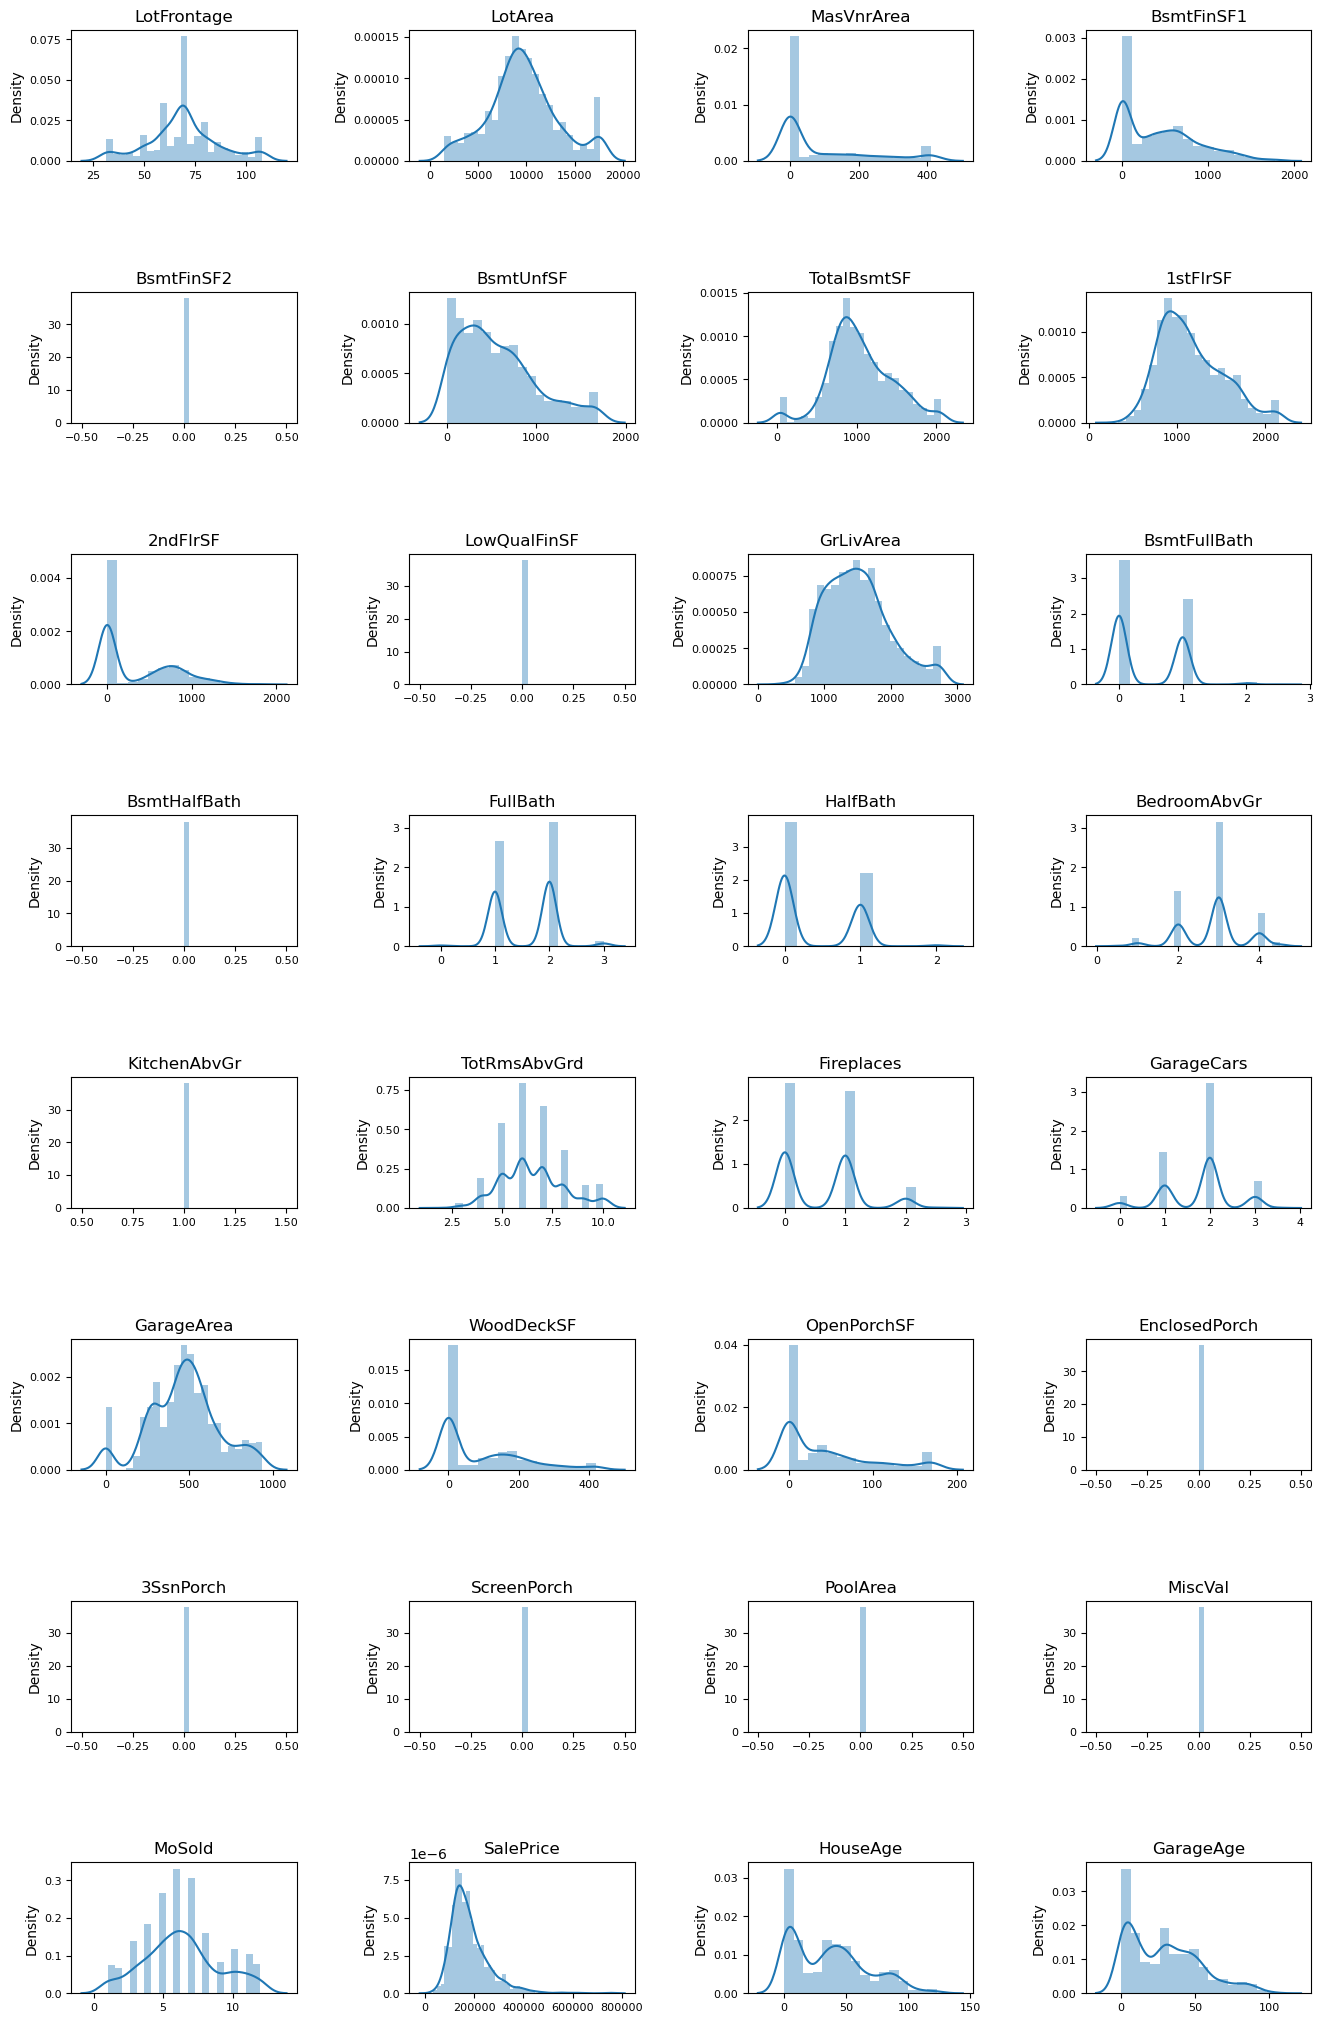

In [48]:
# checking distribution plot for all these numeric variables
plt.figure(figsize=(16,25))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=1, wspace=0.5)
for i in enumerate(numerical_cols):
    plt.subplot(9,4,1+i[0])
    sns.distplot(x=housing[i[1]])
    plt.title(i[1])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
plt.show()   

In [49]:
housing[numerical_cols].describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000      1460.0   
mean     69.090411   9647.388014    89.406336   439.997517         0.0   
std      17.231909   3594.356399   134.017553   433.219435         0.0   
min      31.500000   1481.500000     0.000000     0.000000         0.0   
25%      60.000000   7553.500000     0.000000     0.000000         0.0   
50%      69.000000   9478.500000     0.000000   383.500000         0.0   
75%      79.000000  11601.500000   164.250000   712.250000         0.0   
max     107.500000  17673.500000   410.625000  1780.625000         0.0   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000        1460.0   
mean    563.777740  1050.254795  1157.018151   346.789041           0.0   
std     431.710214   397.937878   362.583002   435.791621           0.0   
min       0.000000    42.000000   334.000000     0.000000           0.0   
25%     223.000000   795.750000   882.000000     0.000000           0.0   
50%     477.500000   991.500000  1087.000000     0.000000           0.0   
75%     808.000000  1298.250000  1391.250000   728.000000           0.0   
max    1685.500000  2052.000000  2155.125000  1820.000000           0.0   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000        1460.0  1460.000000  1460.000000   
mean   1503.735873      0.425000           0.0     1.565068     0.382877   
std     481.375641      0.517373           0.0     0.550916     0.502885   
min     334.000000      0.000000           0.0     0.000000     0.000000   
25%    1129.500000      0.000000           0.0     1.000000     0.000000   
50%    1464.000000      0.000000           0.0     2.000000     0.000000   
75%    1776.750000      1.000000           0.0     2.000000     1.000000   
max    2747.625000      2.500000           0.0     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000        1460.0   1460.000000  1460.000000  1460.000000   
mean       2.851712           1.0      6.487671     0.611301     1.765411   
std        0.759516           0.0      1.541916     0.638959     0.742753   
min        0.500000           1.0      2.000000     0.000000     0.000000   
25%        2.000000           1.0      5.000000     0.000000     1.000000   
50%        3.000000           1.0      6.000000     1.000000     2.000000   
75%        3.000000           1.0      7.000000     1.000000     2.000000   
max        4.500000           1.0     10.000000     2.500000     3.500000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
count  1460.000000  1460.000000  1460.000000         1460.0     1460.0   
mean    470.670719    91.806849    42.603425            0.0        0.0   
std     207.105729   116.658120    52.501584            0.0        0.0   
min       0.000000     0.000000     0.000000            0.0        0.0   
25%     334.500000     0.000000     0.000000            0.0        0.0   
50%     480.000000     0.000000    25.000000            0.0        0.0   
75%     576.000000   168.000000    68.000000            0.0        0.0   
max     938.250000   420.000000   170.000000            0.0        0.0   

       ScreenPorch  PoolArea  MiscVal       MoSold      SalePrice  \
count       1460.0    1460.0   1460.0  1460.000000    1460.000000   
mean           0.0       0.0      0.0     6.321918  180921.195890   
std            0.0       0.0      0.0     2.703626   79442.502883   
min            0.0       0.0      0.0     1.000000   34900.000000   
25%            0.0       0.0      0.0     5.000000  129975.000000   
50%            0.0       0.0      0.0     6.000000  163000.000000   
75%            0.0       0.0      0.0     8.000000  214000.000000   
max            0.0       0.0      0.0    12.000000  755000.000000 

In [50]:
housing[['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].describe()

BsmtFinSF2  LowQualFinSF  BsmtHalfBath  EnclosedPorch  3SsnPorch  \
count      1460.0        1460.0        1460.0         1460.0     1460.0   
mean          0.0           0.0           0.0            0.0        0.0   
std           0.0           0.0           0.0            0.0        0.0   
min           0.0           0.0           0.0            0.0        0.0   
25%           0.0           0.0           0.0            0.0        0.0   
50%           0.0           0.0           0.0            0.0        0.0   
75%           0.0           0.0           0.0            0.0        0.0   
max           0.0           0.0           0.0            0.0        0.0   

       ScreenPorch  PoolArea  MiscVal  
count       1460.0    1460.0   1460.0  
mean           0.0       0.0      0.0  
std            0.0       0.0      0.0  
min            0.0       0.0      0.0  
25%            0.0       0.0      0.0  
50%            0.0       0.0      0.0  
75%            0.0       0.0      0.0  
max            0.0       0.0      0.0

In [51]:
# we observe that after imputation of the outliers , all the values are zero now. So these columns can be dropped as it will have no impact on Target value
# Also 'KitchenAbvGr' is having only one value ie 1 , so it will be not useful in our analysis, we can drop this also.

In [52]:
housing.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','KitchenAbvGr'],axis=1,inplace=True)

In [53]:
housing.shape

(1460, 69)

In [54]:
# list of numeric columns have changed so generating again 
numerical_cols = housing.select_dtypes(['float64','int64']).columns

In [55]:
numerical_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'SalePrice', 'HouseAge', 'GarageAge'],
      dtype='object')

Let us check distribution of numerical variable against target variable 

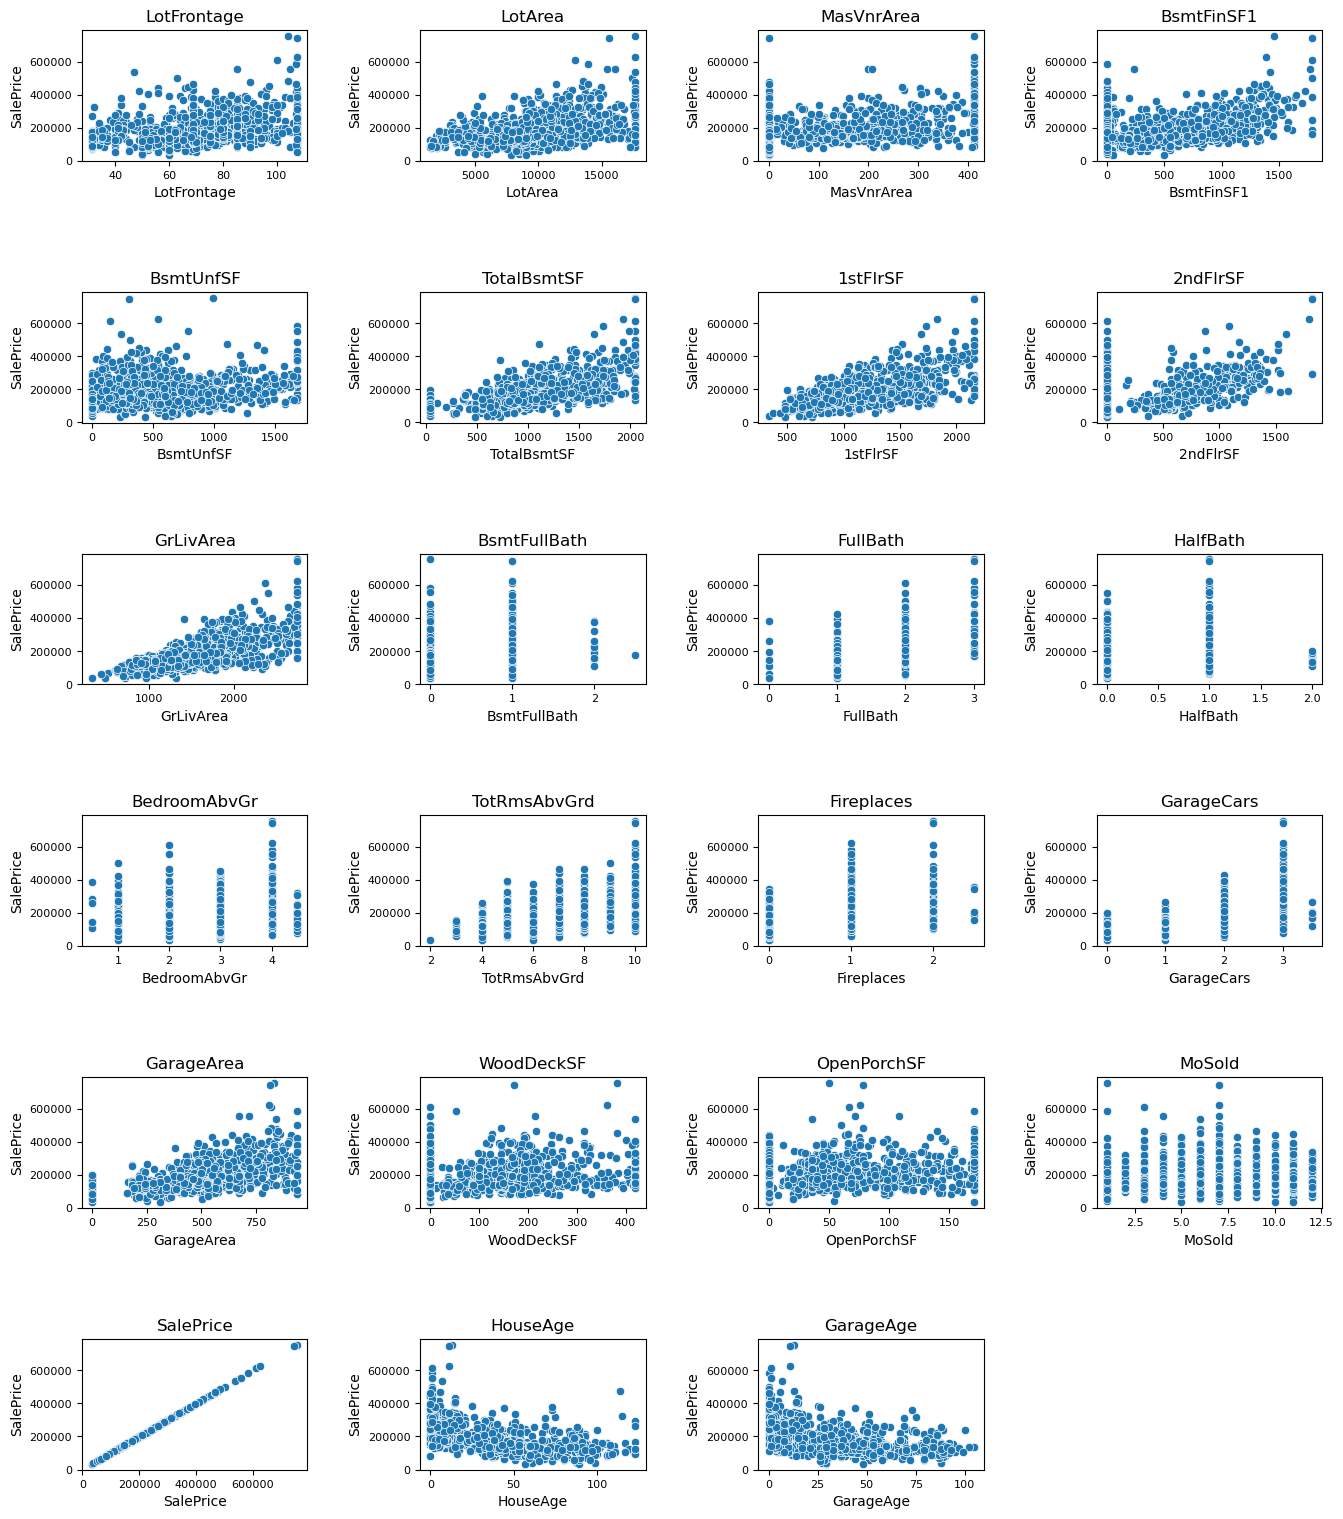

In [56]:
# checking scatter plot for all these numeric variables against sale price . 
plt.figure(figsize=(16,25))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=1, wspace=0.5)
for i in enumerate(numerical_cols):
    plt.subplot(9,4,1+i[0])
    sns.scatterplot(x=str(i[1]),y='SalePrice',data=housing)
    plt.title(i[1])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
plt.show() 

Observation :
1. With increase in age of House and Garage at the time of sell , price is decreasing ie showing negative co-relation . 
2. Scatter plot of LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea and GarageArea indicates positive co-relation with SalPrice. 
3. Many other features like GarageCars, FirePlaces etc have some discrete values.

- Let us do univariate analysis for categorical variables

In [57]:
# checking the list of categorical columns 
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'RemodAdd_Done'],
      dtype='object')

In [58]:
categorical_cols.shape

(46,)

In [59]:
# there are 46 columns , we can further sub categorize so that analysis becomes more meaningful.
# grouping direct arributes of property
categorical_cols_property = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'MSSubClass', 
                             'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType','RemodAdd_Done']

# grouping attributes related to building 
categorical_cols_building = ['HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'SaleType', 'SaleCondition']

# grouping basement and related attributes 
categorical_cols_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu']

# grouping garage and other attributes 
categorical_cols_garage = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','Fence', 'MiscFeature']

In [60]:
# define function to generate count plot for categorical columns 
def get_count_plot(columns_list):
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=1, wspace=0.5)
    for i in enumerate(columns_list):
        plt.subplot(5,3,1+i[0])
        sns.countplot(x=housing[i[1]])
        plt.title(i[1])
        plt.xticks(fontsize=8,rotation='vertical')
        plt.yticks(fontsize=8)
    plt.show()

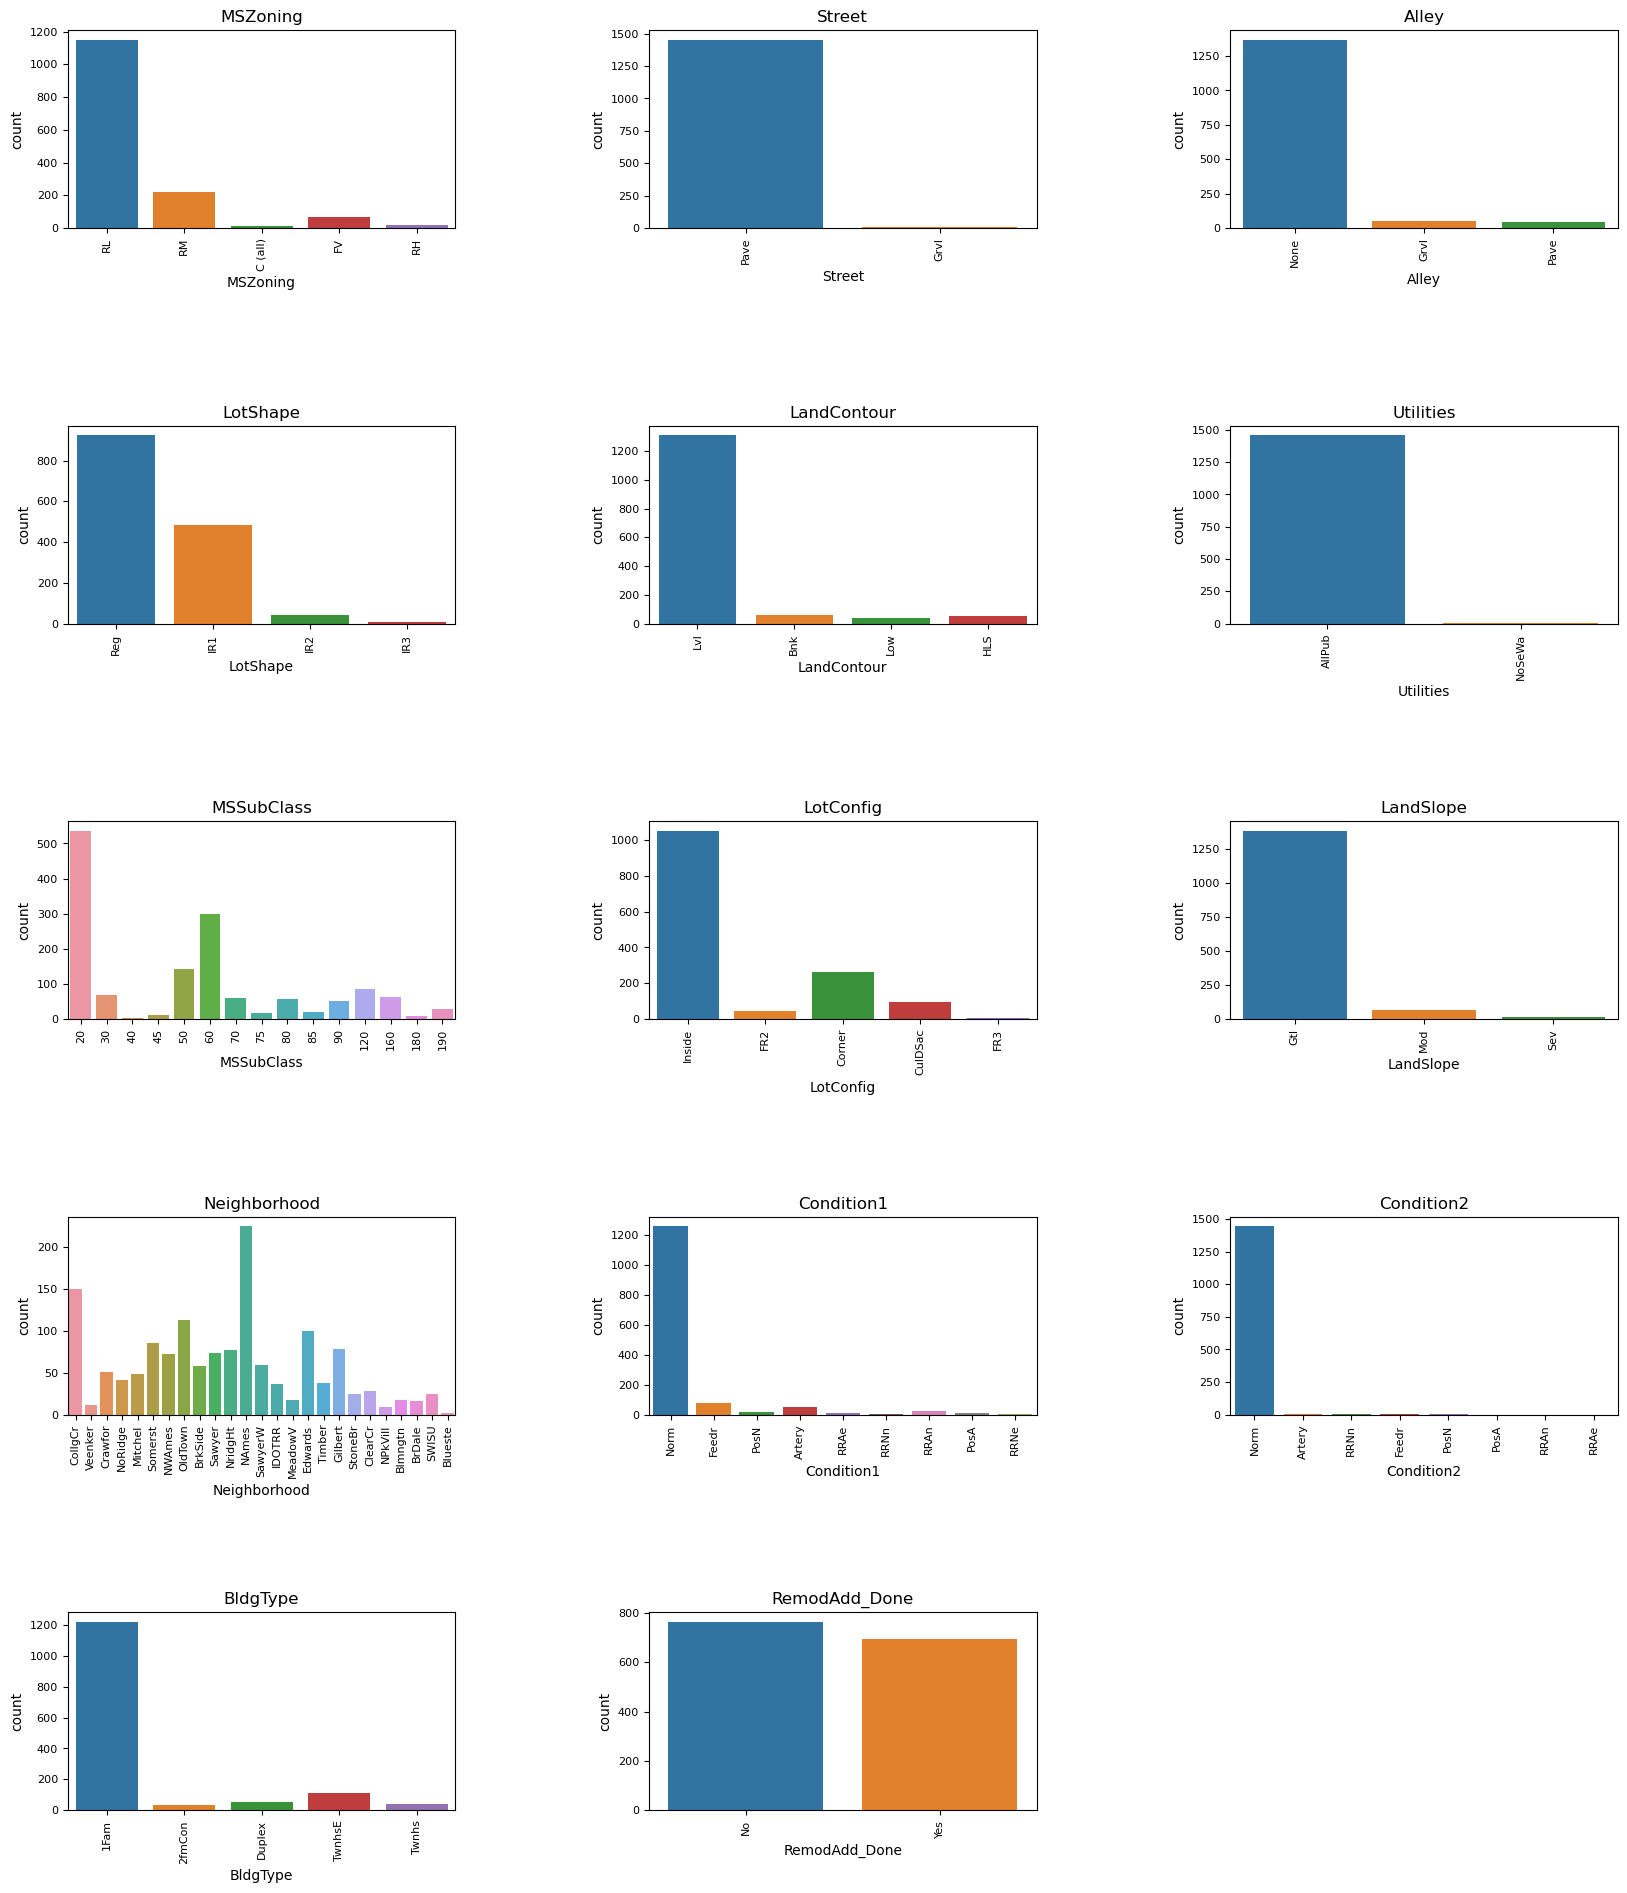

In [61]:
# Analyzing frequency/distribution of all columns categorized as property attributes 
get_count_plot(categorical_cols_property)

Observations: 

Except RemodAdd_Done , LotShape and Neighborhood , all other columns have one value used  mostly . For example condition1 and condition2 has high frequency.

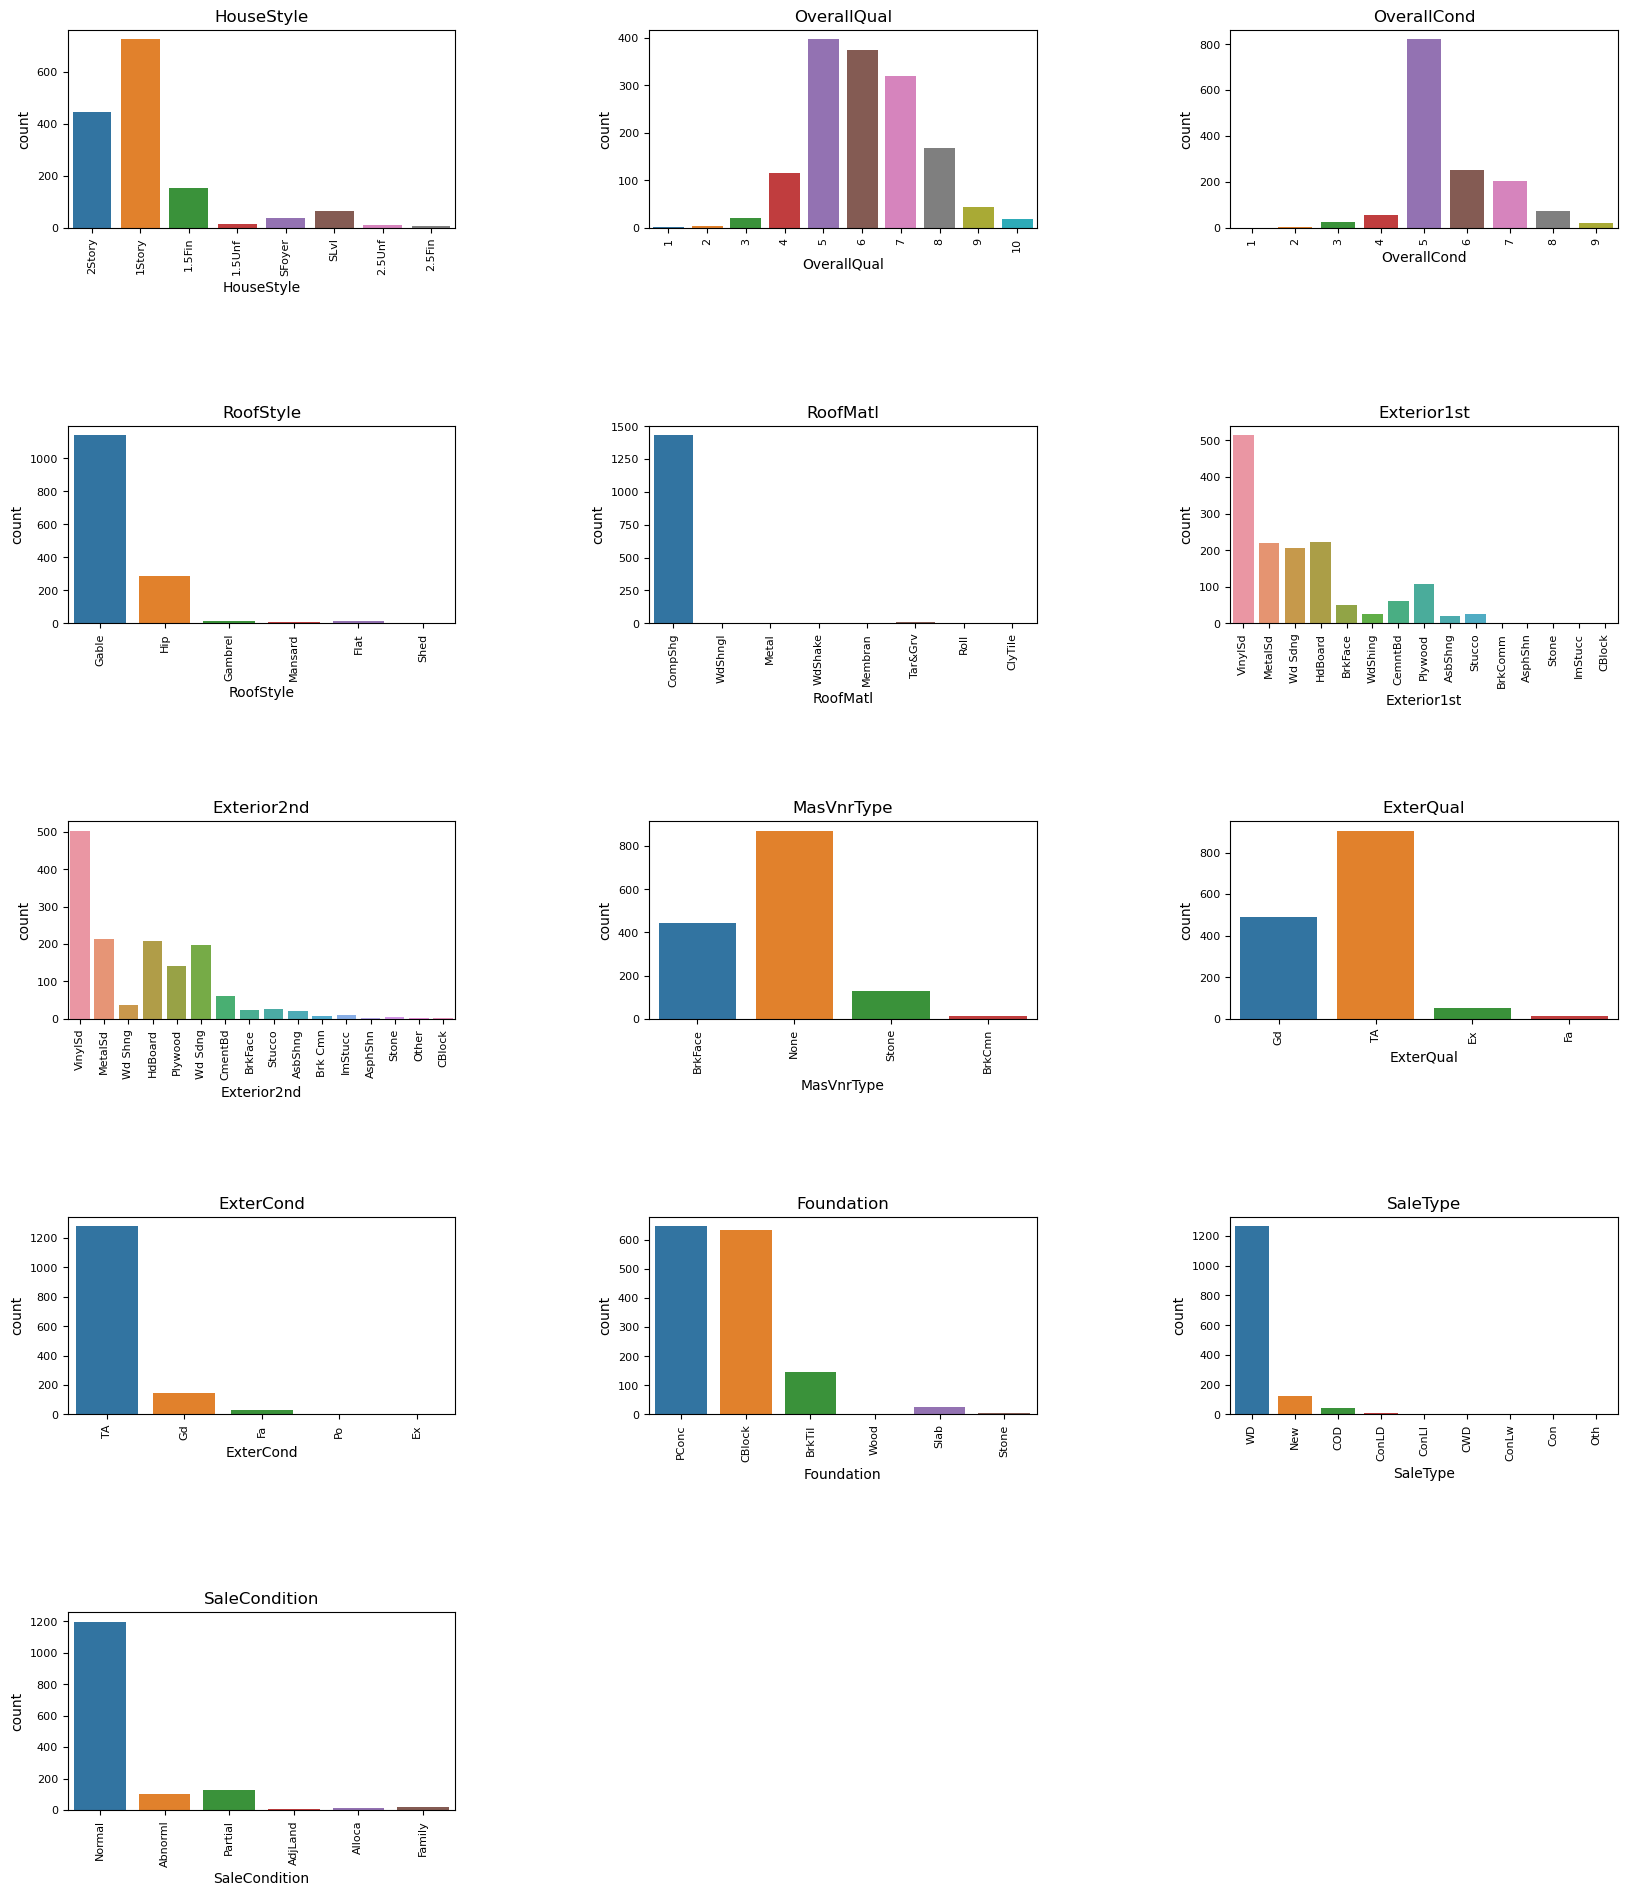

In [62]:
# Analyzing frequency/distribution of all columns categorized as building
get_count_plot(categorical_cols_building)

Observations:

1. Mostly houses have overall quality and overall condition above average.
2. Most of the houses have roof material as standard composite shingles. 
3. Most of the houses have sales type as waranty deed - conventional. 

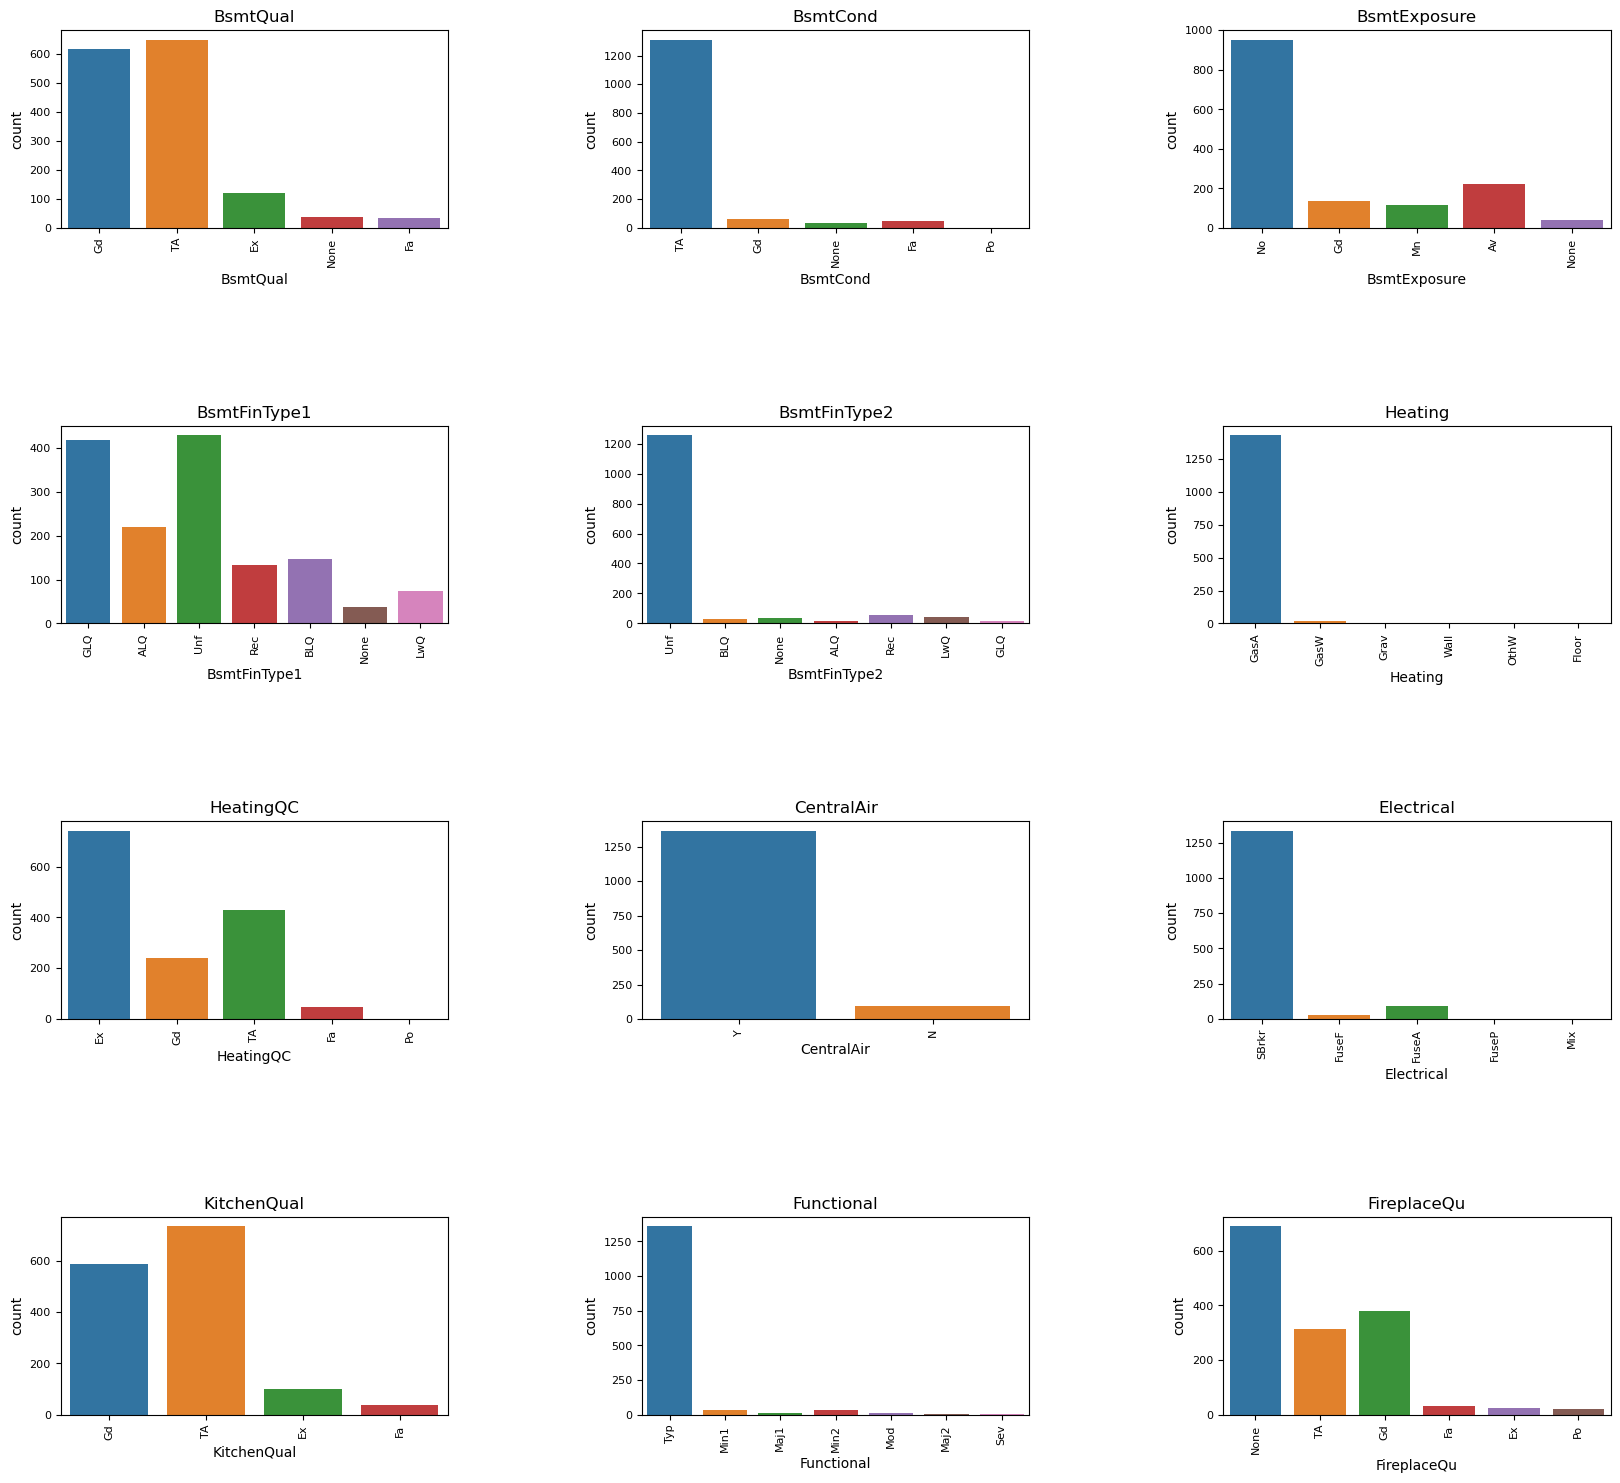

In [63]:
# Analyzing frequency/distribution of all columns categorized as basement related
get_count_plot(categorical_cols_basement)

Observations:
1. Most of the houses have Standard Circuit Breakers & Romex electrical systems. 
2. Mostly houses have central air conditioning .
3. Mostly houses have 'Gas forced warm air furnace' type of heating.

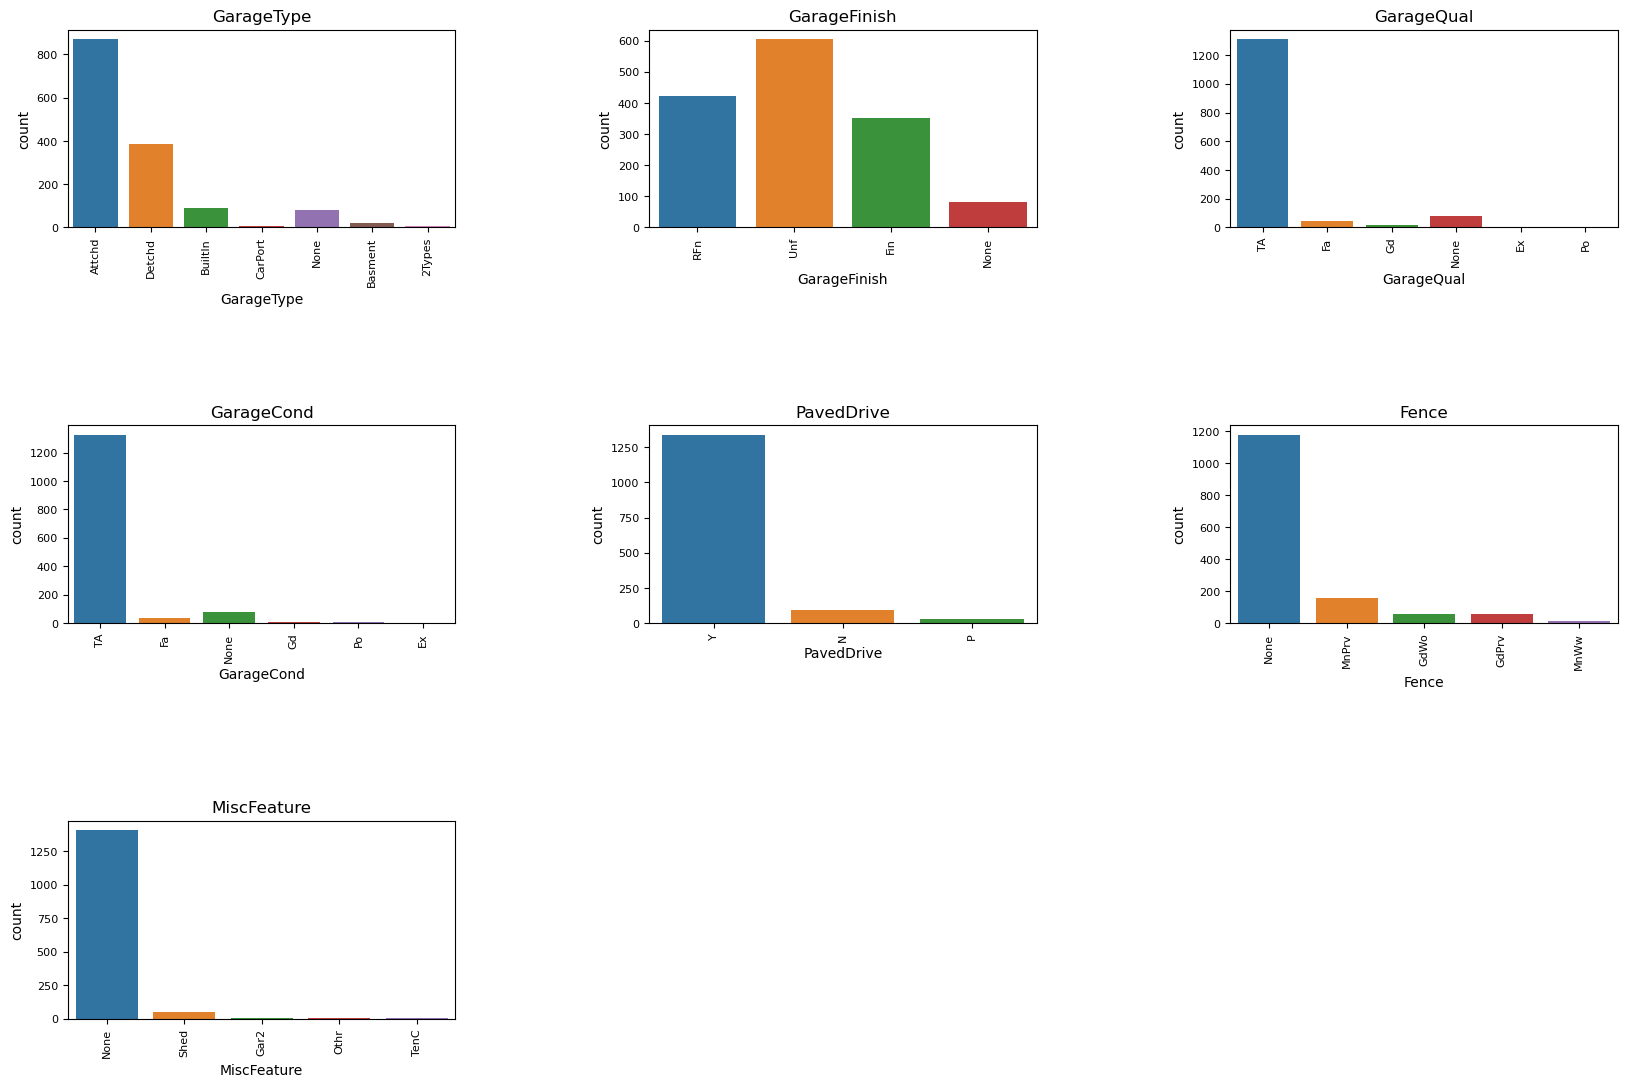

In [64]:
# Analyzing frequency/distribution of all columns categorized as garage
get_count_plot(categorical_cols_garage)

Observation:

Most of the houses have Typical/Average garage quality/condition.

- Let us do bi-variate analysis of categorical variables against target variable ie sale price. 


In [65]:
# define function to generate bar plot for categorical columns 
def get_bar_plot(columns_list):
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=1, wspace=0.5)
    for i in enumerate(columns_list):
        plt.subplot(5,3,1+i[0])
        sns.barplot(x=str(i[1]),y='SalePrice',data=housing)
        plt.title(i[1])
        plt.xticks(fontsize=8,rotation='vertical')
        plt.yticks(fontsize=8)
    plt.show()

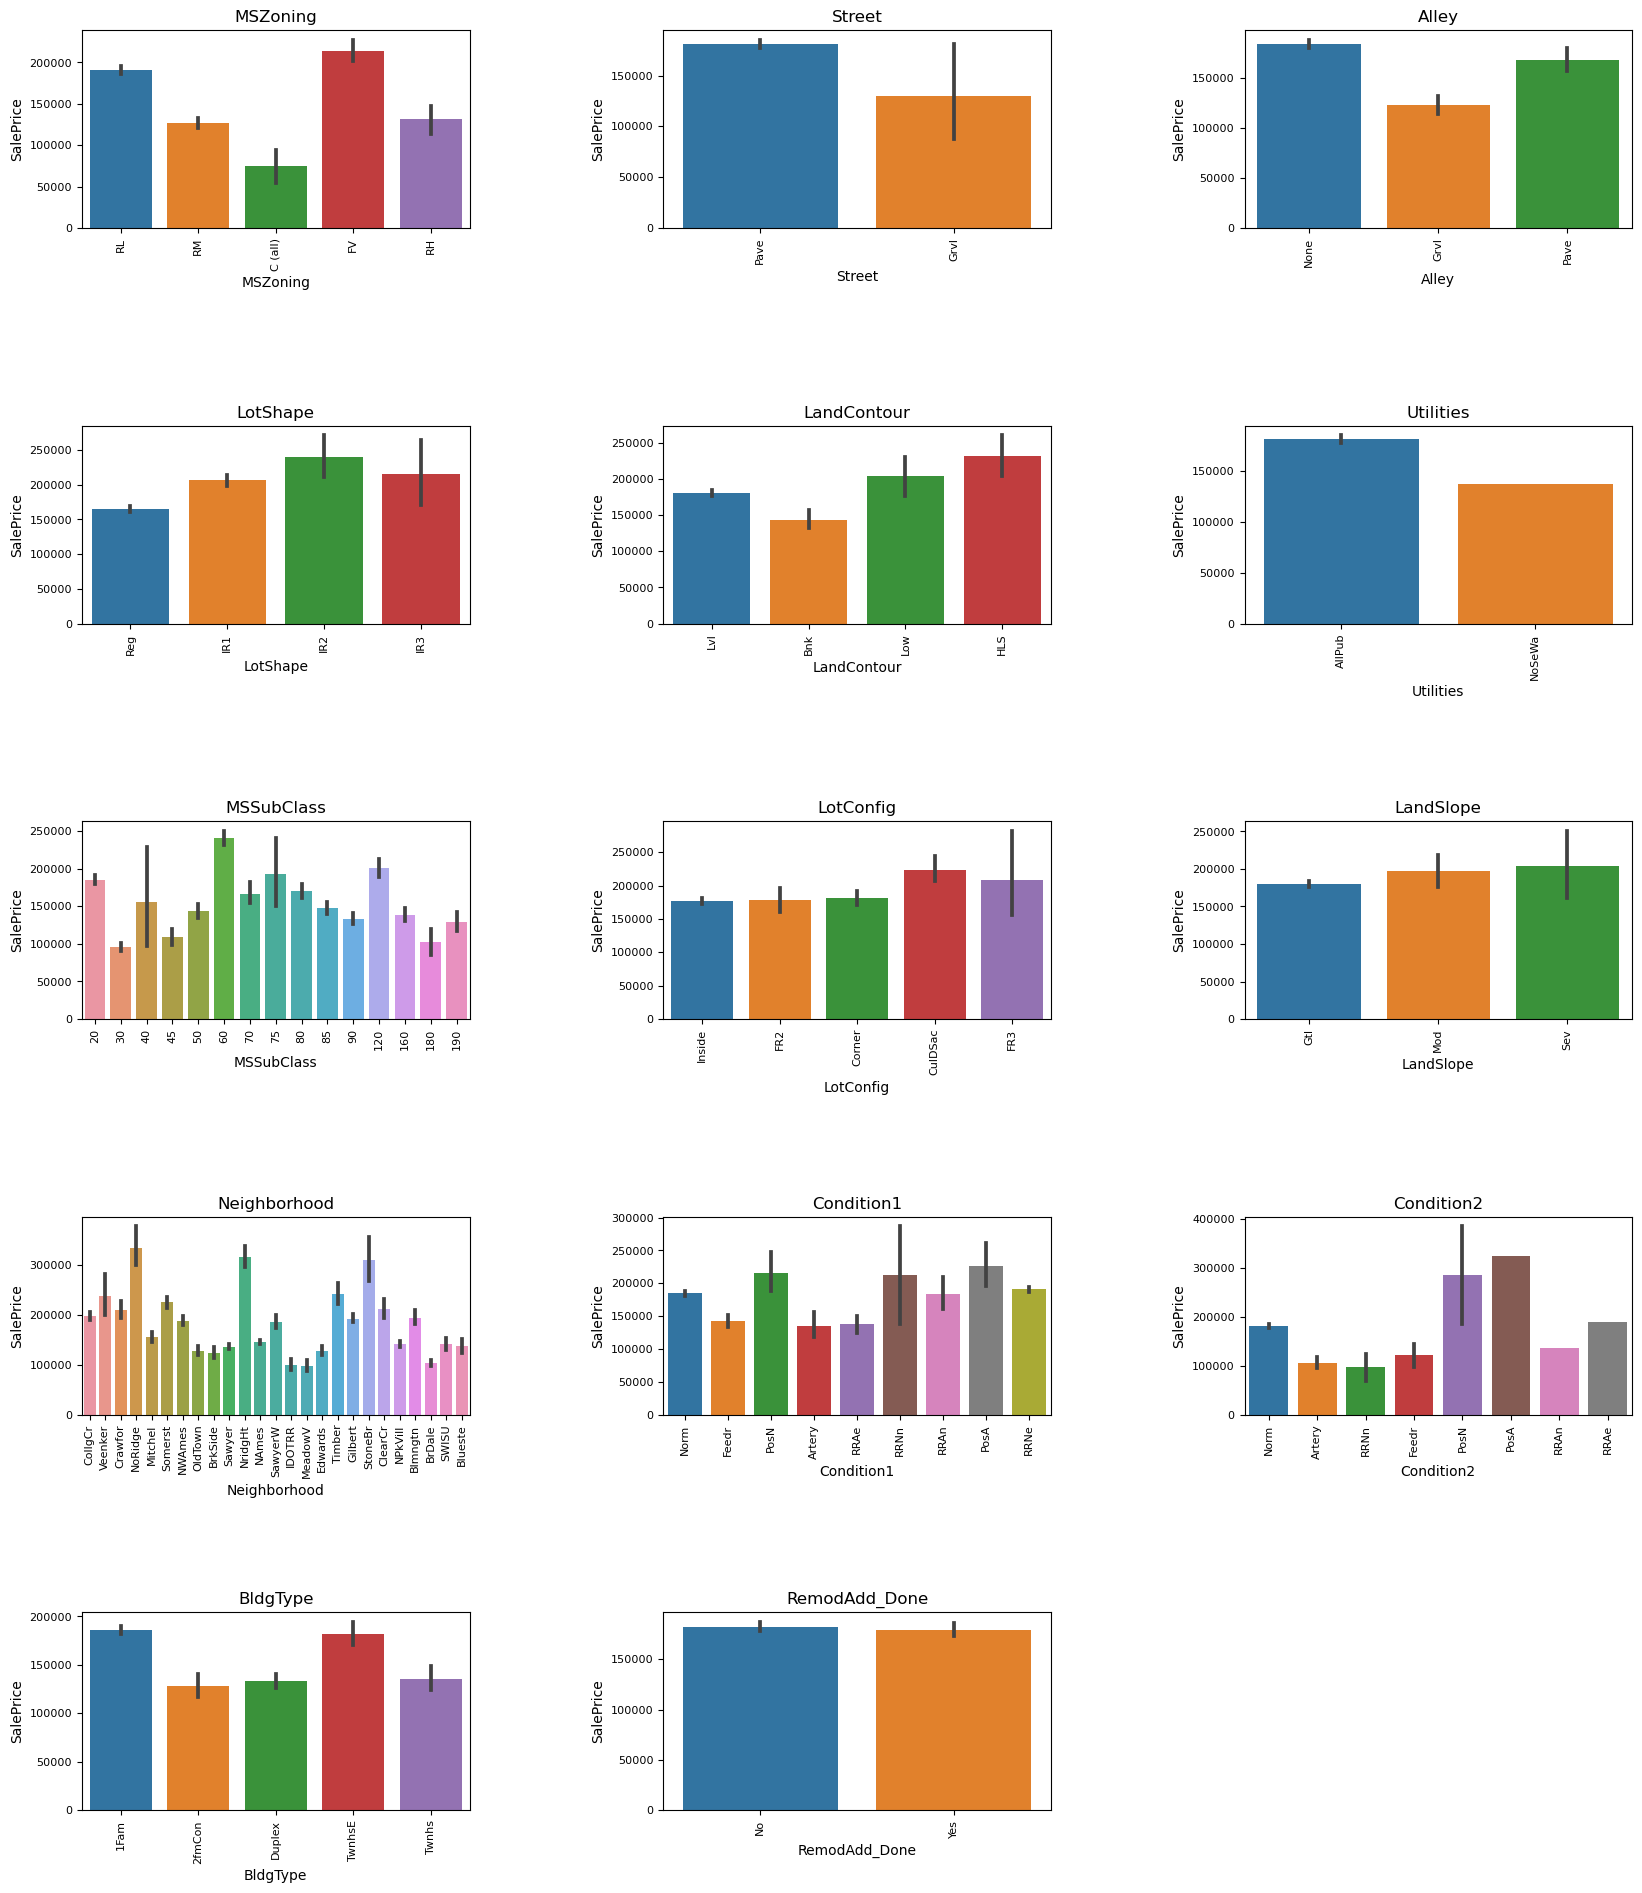

In [66]:
# analysisng target variable against categorical variable related property attributes
get_bar_plot(categorical_cols_property)

Observations:

1. Houses with paved road have high average sale price. 
2. Houses with all public utilities have high average sale price.
3. Houses with 'single family detached' and 'Townhouse End unit' have higher averge sale price. 


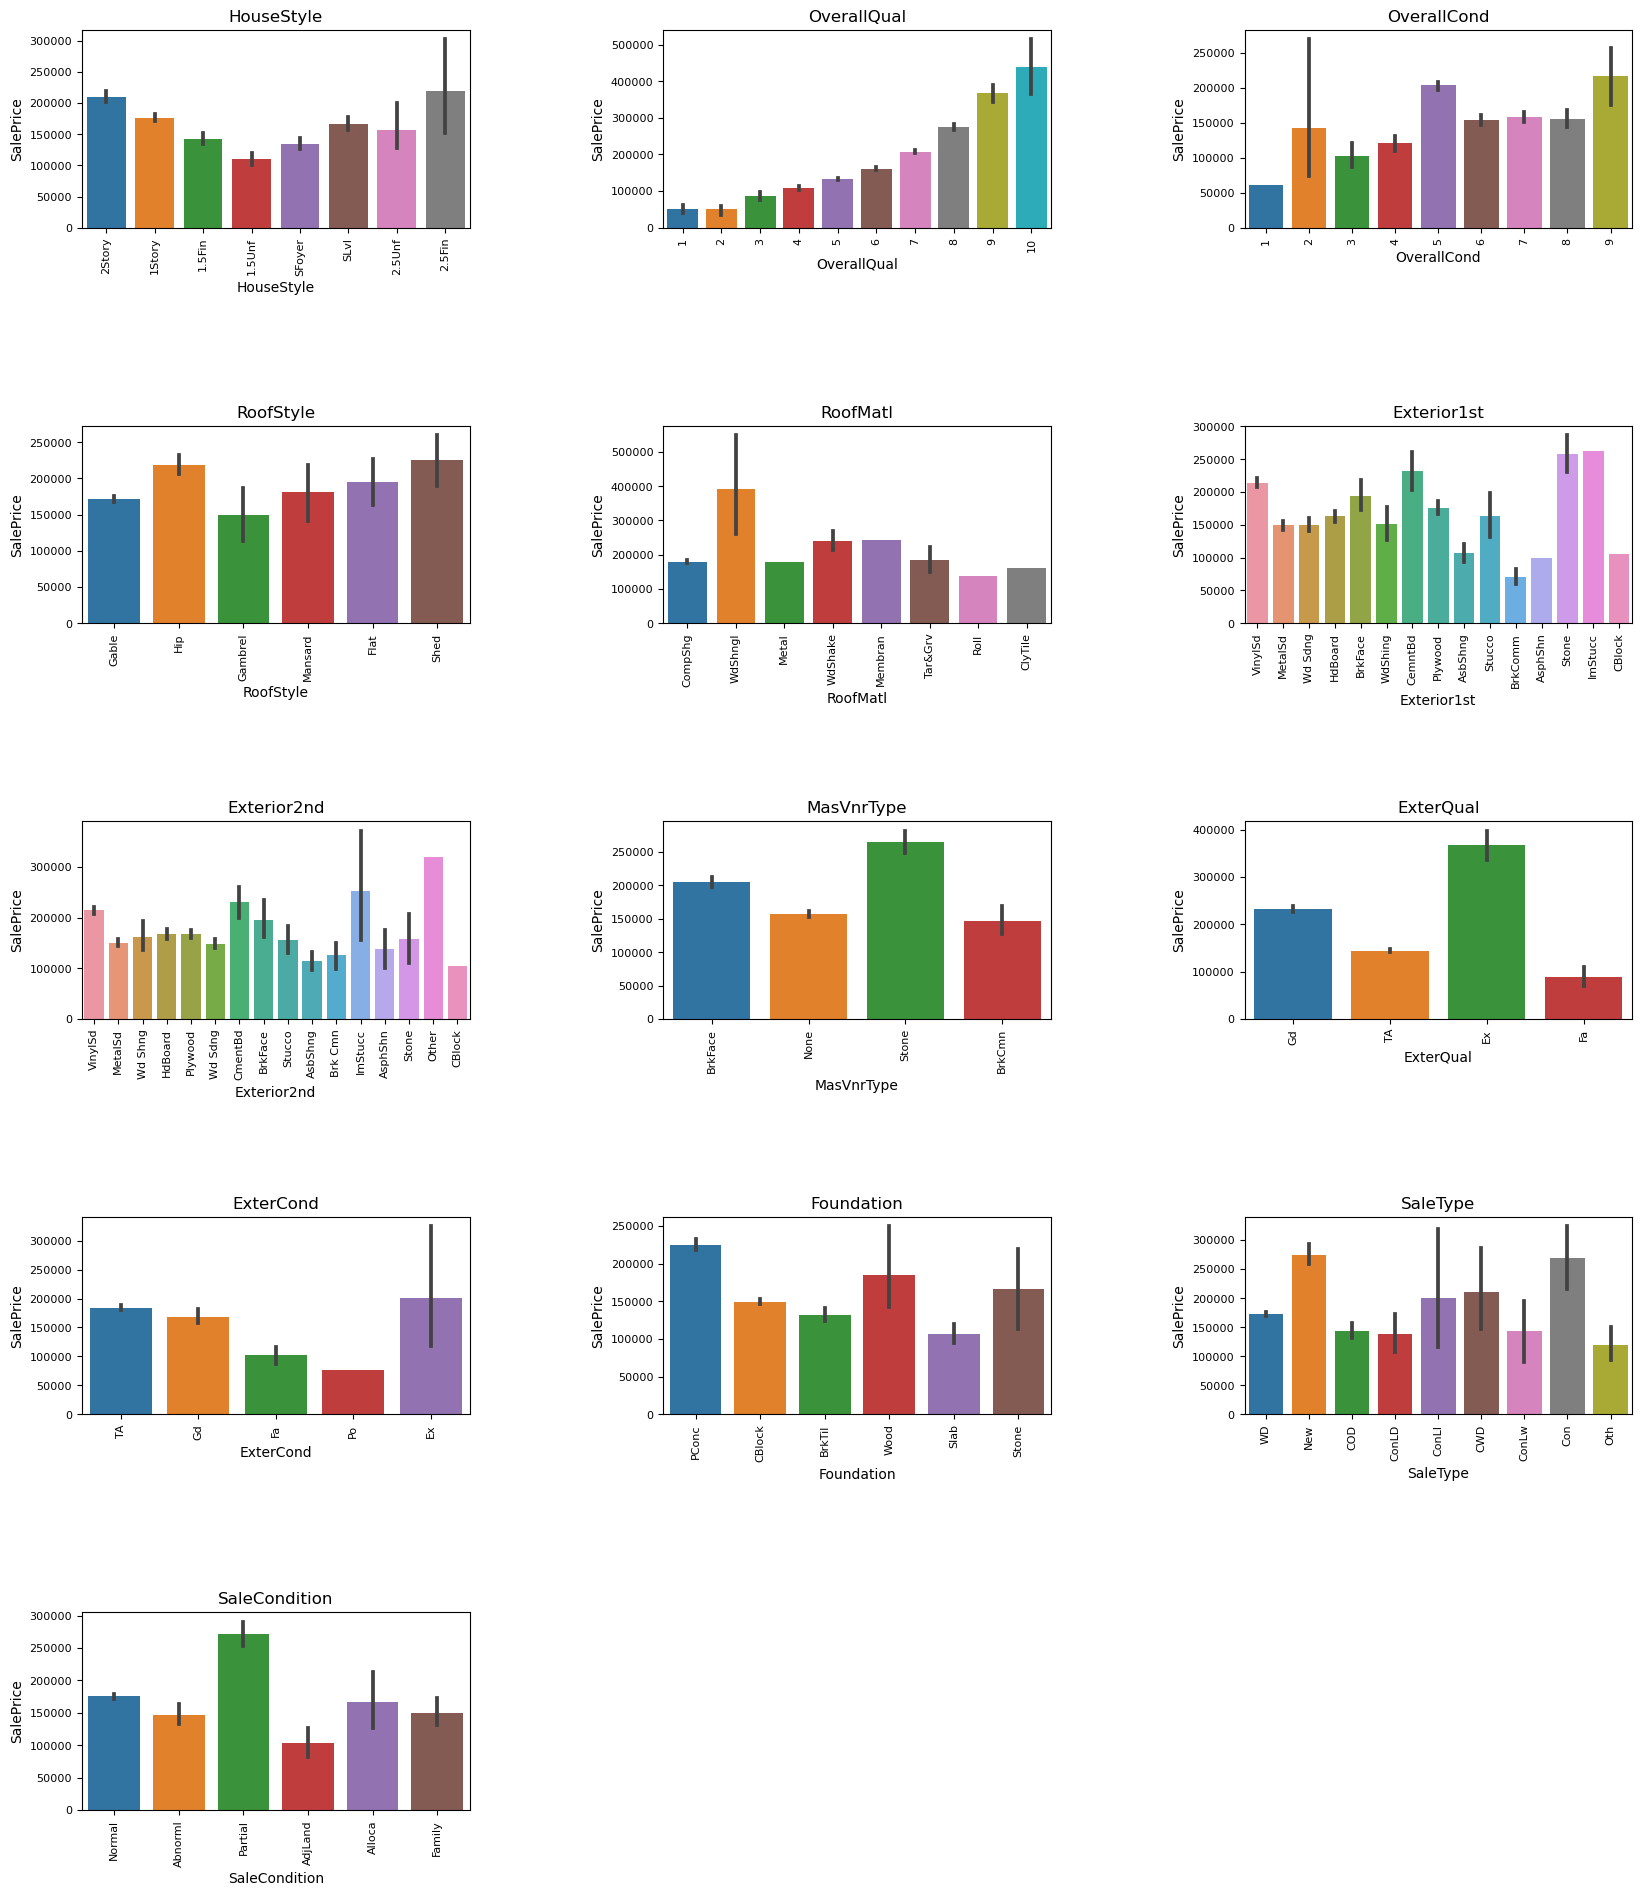

In [67]:
# analysisng target variable against categorical variable related building attributes
get_bar_plot(categorical_cols_building)

Observations
1. Average sale price increases with overall quality of the house.
2. Average sale price is higher for house with Roof material - Wood Shingles. 
3. Average sale price is higher for house with Masonry veneer type of stone.

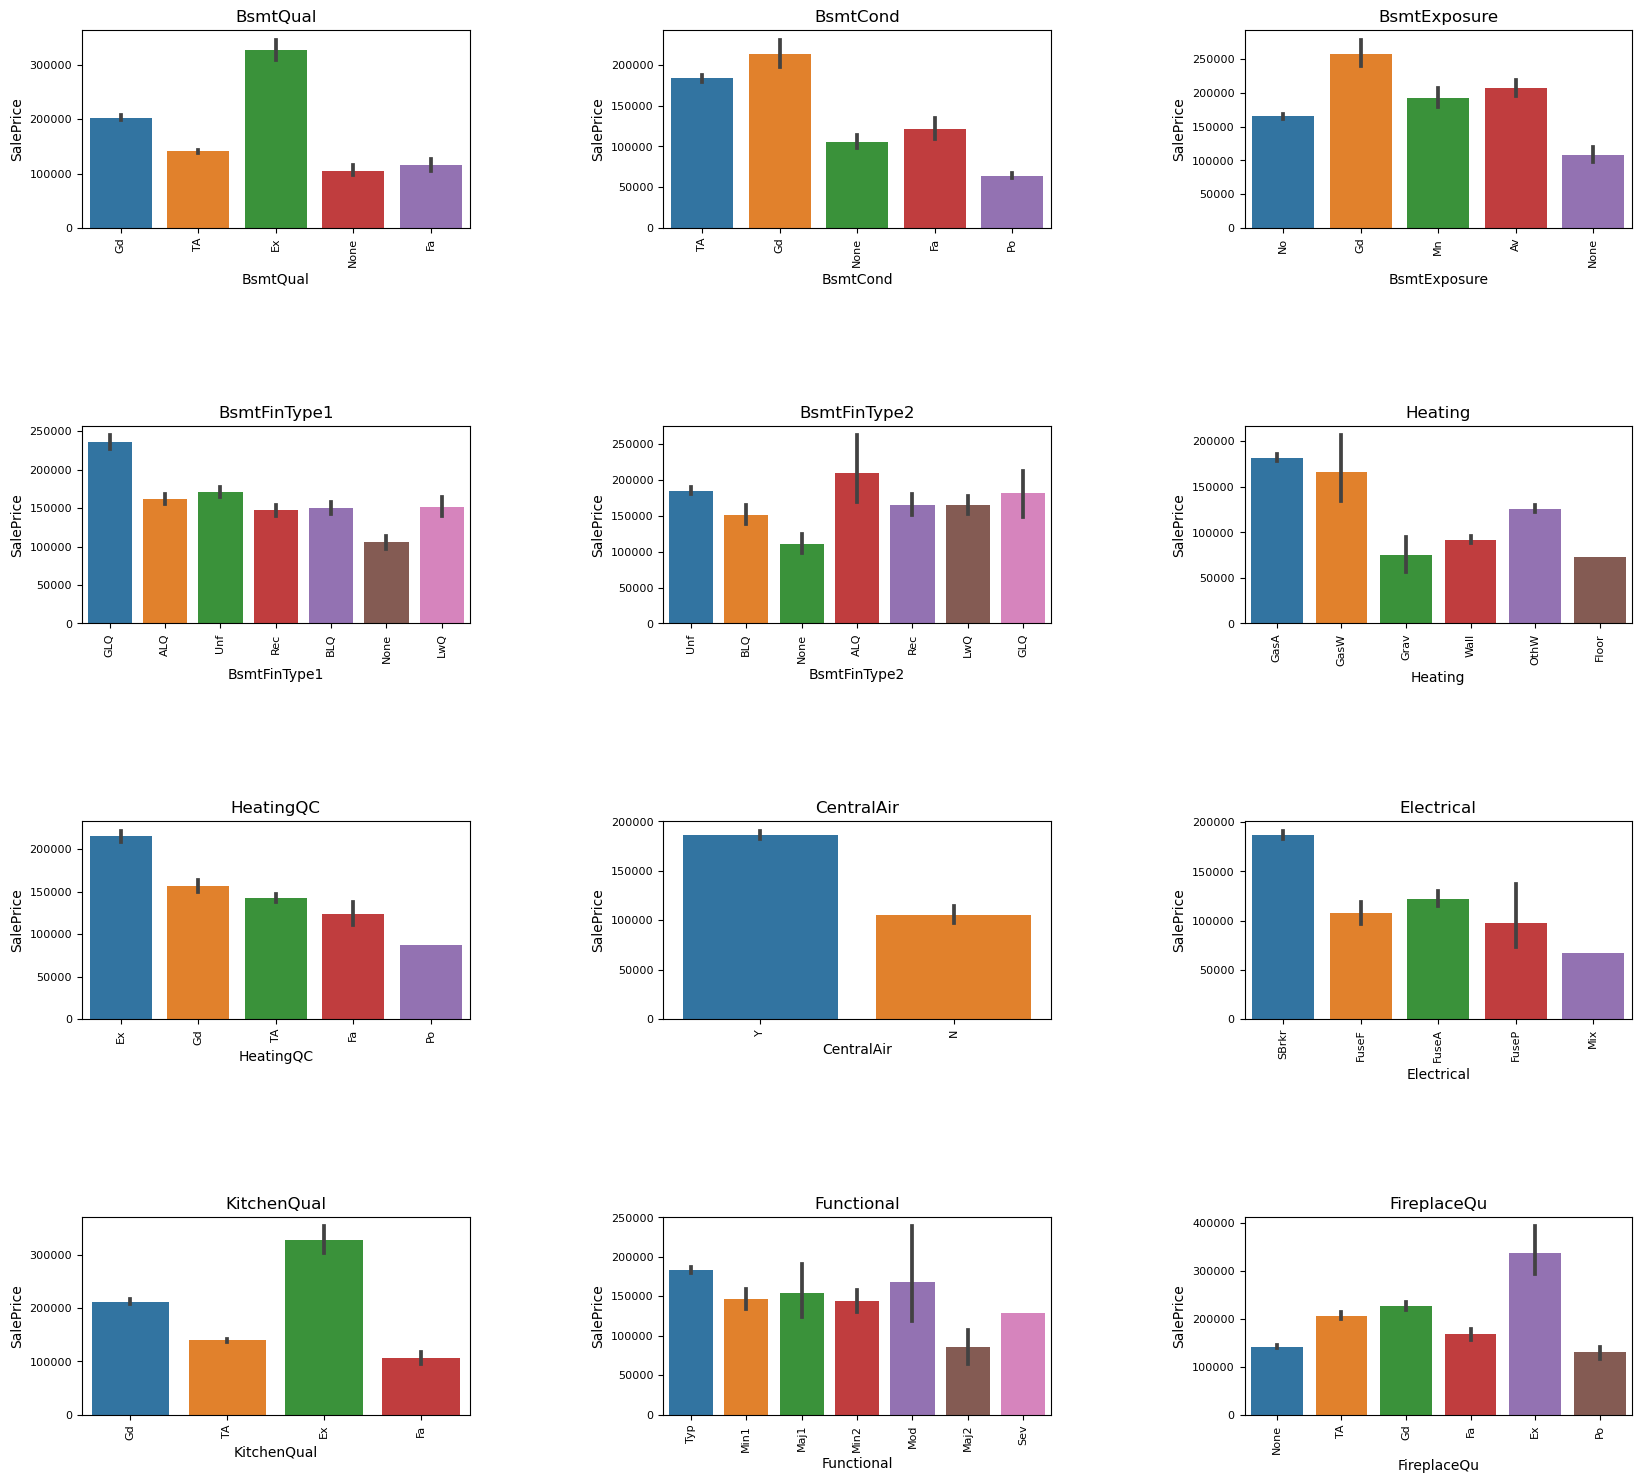

In [68]:
# analysisng target variable against categorical variable related basement attributes
get_bar_plot(categorical_cols_basement)

Observations 
1. Average sale price is higher for houses with excellent kitchen quality.
2. Average sale price is higer for houses with 'Standard Circuit Breakers & Romex' electrical systems.
3. Average sale price is higher for houses with excellent basement quality. 

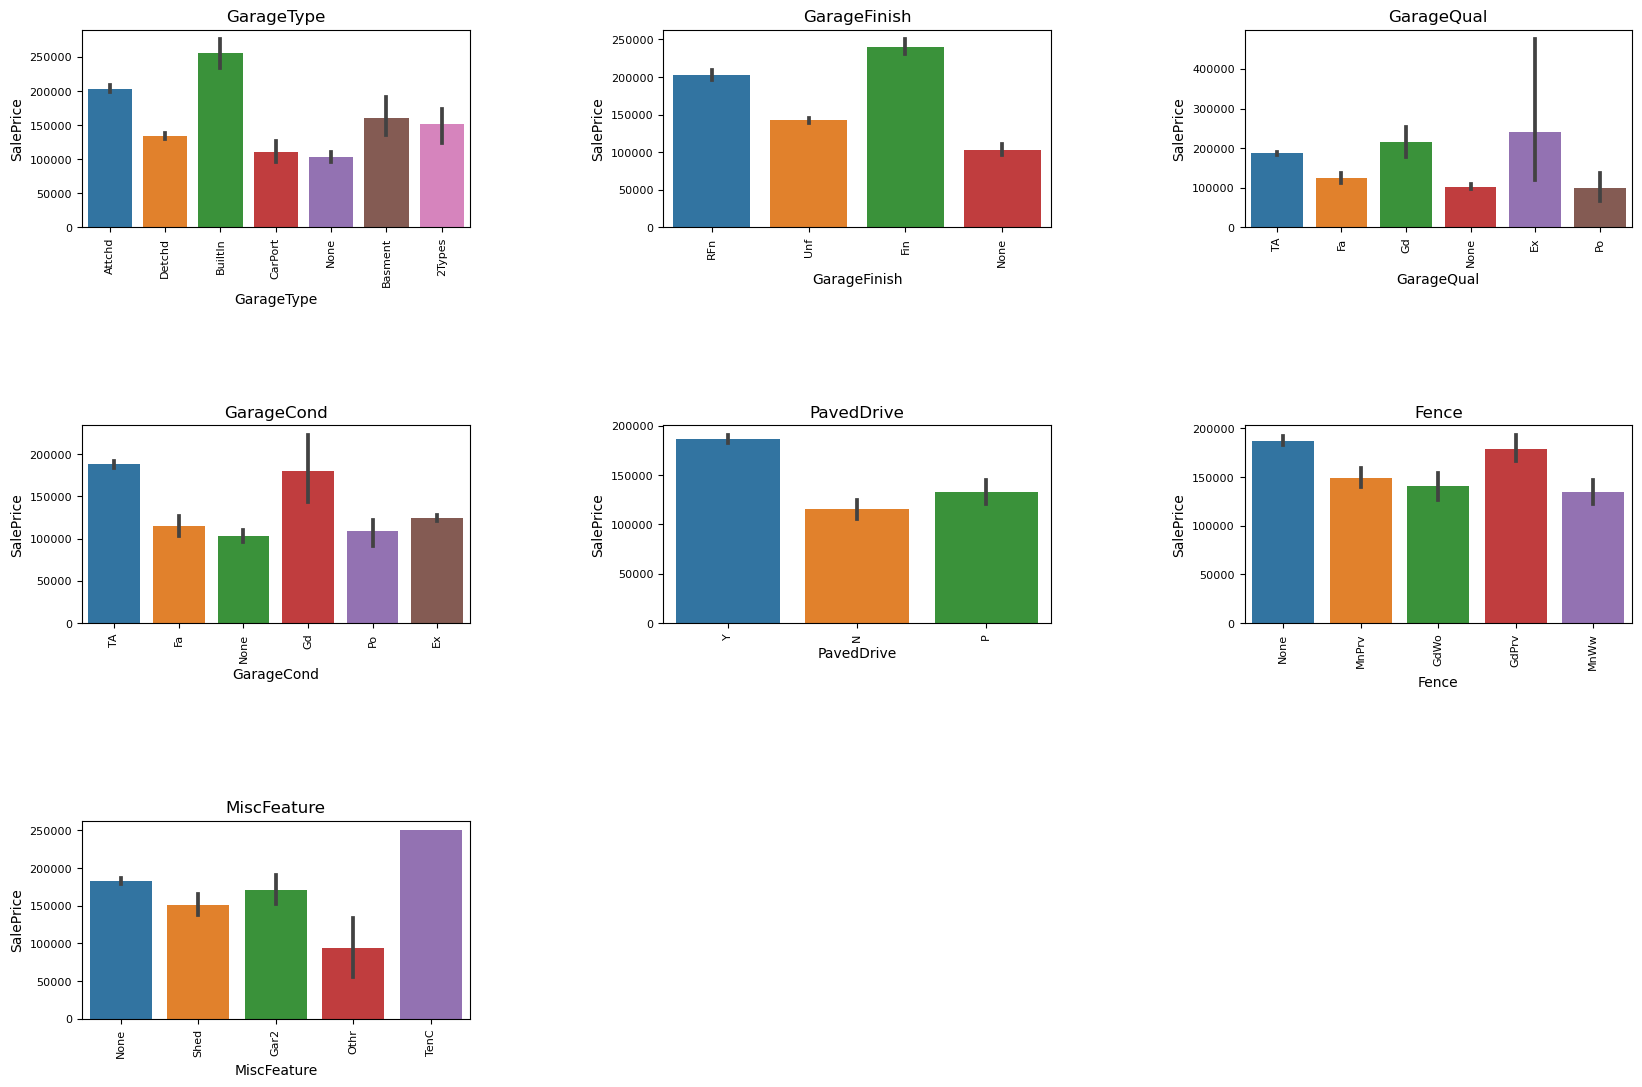

In [69]:
# analysisng target variable against categorical variable related garage attributes
get_bar_plot(categorical_cols_garage)

Observations 
1. Average sale price is higher for houses with paved driveway.
2. Average sale price is hihger for houses with built-in garage. 


Numerical cloumns - Correlations

In [70]:
numerical_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'SalePrice', 'HouseAge', 'GarageAge'],
      dtype='object')

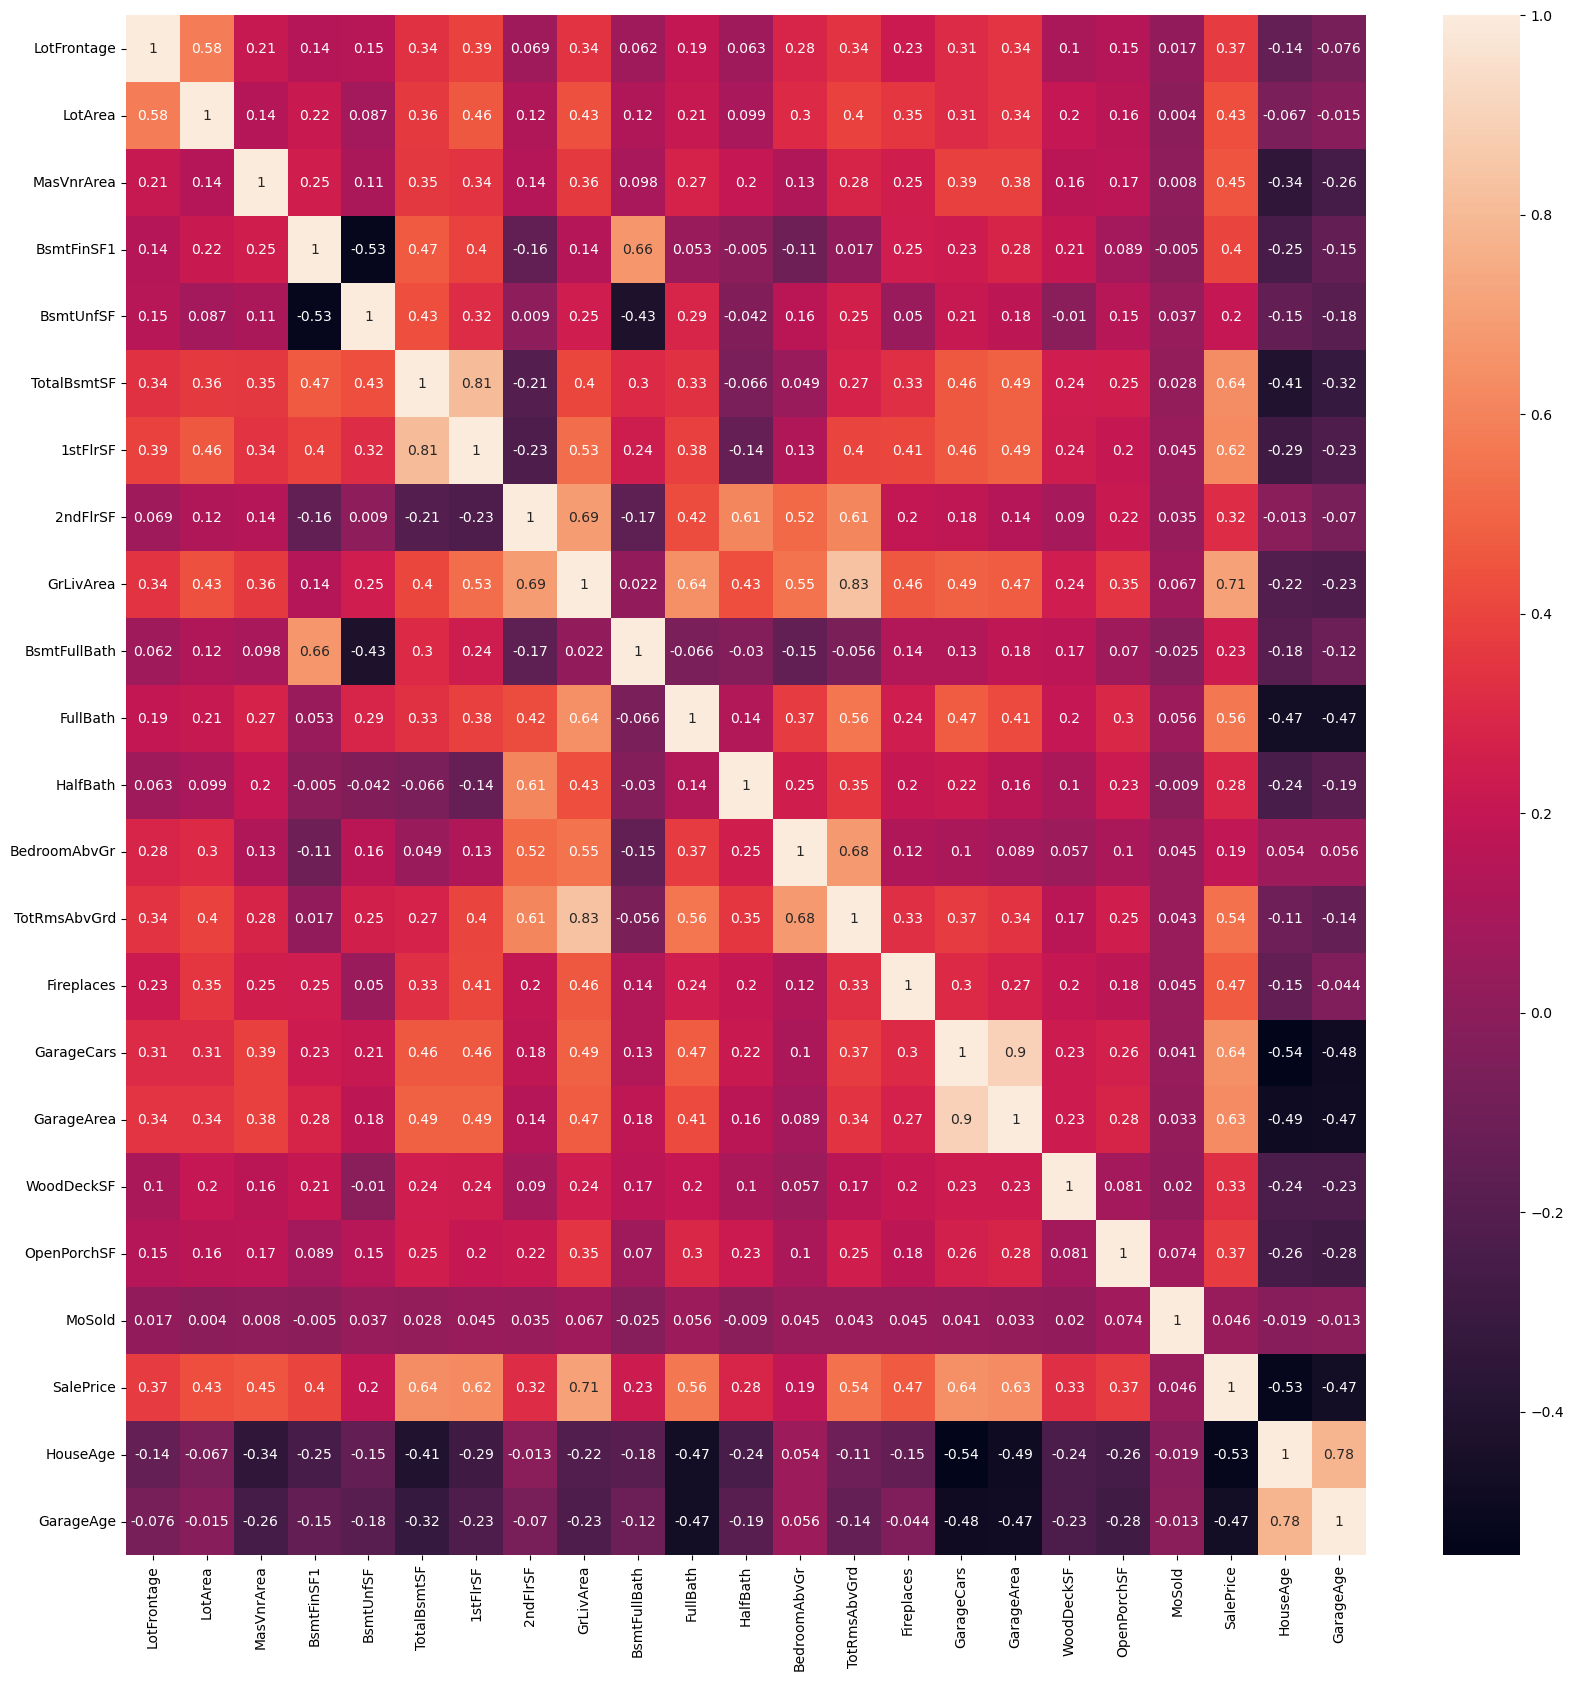

In [71]:
# generating heatmap for numrical variables 
plt.figure(figsize=(20,20))
sns.heatmap(round(housing[numerical_cols].corr(),3),annot=True)
plt.show()

Observations:

1. House Age and Garage Age has high positive co-relation 
2. SalePrice has high correlation(0.71) with GrLivArea
3. GarageArea and GarageCars have high positive correlation(0.9)
4. TotRmsAbvGrd and GrLivArea have high positive correlation(0.83)

### 3. Data Preparation 

In [72]:
# we have to create dummy variables for all the 45 categorical variables
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'RemodAdd_Done'],
      dtype='object')

In [73]:
categorical_cols.shape

(46,)

In [74]:
dummy_data = pd.get_dummies(housing[categorical_cols],drop_first=True,dtype='int')
dummy_data.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [75]:
dummy_data.shape

(1460, 252)

In [76]:
# merging the dummy data 
housing = pd.concat([housing,dummy_data],axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0   8450.0   Pave  None      Reg         Lvl   
1         20       RL         80.0   9600.0   Pave  None      Reg         Lvl   
2         60       RL         68.0  11250.0   Pave  None      IR1         Lvl   
3         70       RL         60.0   9550.0   Pave  None      IR1         Lvl   
4         60       RL         84.0  14260.0   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           7           5     Gable  CompShg     VinylSd   
1     1Story           6           8     Gable  CompShg     MetalSd   
2     2Story           7           5     Gable  CompShg     VinylSd   
3     2Story           7           5     Gable  CompShg     Wd Sdng   
4     2Story           8           5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  \
0       TA           No          GLQ       706.0          Unf      150.0   
1       TA           Gd          ALQ       978.0          Unf      284.0   
2       TA           Mn          GLQ       486.0          Unf      434.0   
3       Gd           No          ALQ       216.0          Unf      540.0   
4       TA           Av          GLQ       655.0          Unf      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr     856.0       854   
1         1262    GasA        Ex          Y      SBrkr    1262.0         0   
2          920    GasA        Ex          Y      SBrkr     920.0       866   
3          756    GasA        Gd          Y      SBrkr     961.0       756   
4         1145    GasA        Ex          Y      SBrkr    1145.0      1053   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  \
0     1710.0           1.0         2         1           3.0          Gd   
1     1262.0           0.0         2         0           3.0          TA   
2     1786.0           1.0         2         1           3.0          Gd   
3     1717.0           1.0         1         0           3.0          Gd   
4     2198.0           1.0         2         1           4.0          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0             8        Typ         0.0        None     Attchd          RFn   
1             6        Typ         1.0          TA     Attchd          RFn   
2             6        Typ         1.0          TA     Attchd          RFn   
3             7        Typ         1.0          Gd     Detchd          Unf   
4             9        Typ         1.0          TA     Attchd          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0         2.0       548.0         TA         TA          Y           0   
1         2.0       460.0         TA         TA          Y         298   
2         2.0       608.0         TA         TA          Y

In [77]:
housing.shape

(1460, 321)

In [78]:
# now droping the original categorical columns 
housing.drop(categorical_cols,axis=1,inplace=True)
housing.shape


(1460, 275)

In [79]:
housing.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0   8450.0       196.0       706.0      150.0          856   
1         80.0   9600.0         0.0       978.0      284.0         1262   
2         68.0  11250.0       162.0       486.0      434.0          920   
3         60.0   9550.0         0.0       216.0      540.0          756   
4         84.0  14260.0       350.0       655.0      490.0         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0     856.0       854     1710.0           1.0         2         1   
1    1262.0         0     1262.0           0.0         2         0   
2     920.0       866     1786.0           1.0         2         1   
3     961.0       756     1717.0           1.0         1         0   
4    1145.0      1053     2198.0           1.0         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0           3.0             8         0.0         2.0       548.0           0   
1           3.0             6         1.0         2.0       460.0         298   
2           3.0             6         1.0         2.0       608.0           0   
3           3.0             7         1.0         3.0       642.0           0   
4           4.0             9         1.0         3.0       836.0         192   

   OpenPorchSF  MoSold  SalePrice  HouseAge  GarageAge  MSSubClass_30  \
0           61       2     208500         5        5.0              0   
1            0       5     181500        31       31.0              0   
2           42       9     223500         7        7.0              0   
3           35       2     140000        91        8.0              0   
4           84      12     250000         8        8.0              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0              0              0               0   
4              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
0            1            0            1           1           0   
1            1            0            1           1           0   
2            1            0            1           1           0   
3            1            0            1           1           0   
4            1            0            1           1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0

- Splitting entire dataset into train and test dataset 

In [80]:
housing_train,housing_test = train_test_split(housing,train_size=0.7,random_state=100)

In [81]:
# verifying the shape after split
print('Shape of Train data :',housing_train.shape)
print('Shape of Test data  :',housing_test.shape)

Shape of Train data : (1021, 275)
Shape of Test data  : (439, 275)


- Rescaling the numerical columns excluding dummy variables 


In [82]:
# instantiate an object 
scaler = MinMaxScaler()

In [83]:
# Applying the scaler() to all the numeric columns with continuous values except true/false variable and dummy variables which we created 
housing_train[numerical_cols] = scaler.fit_transform(housing_train[numerical_cols]) 

In [84]:
# verifying numeric columns after scaling 
housing_train[numerical_cols].head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
318      0.769737  0.519917     0.62344    0.554300   0.213586     0.649254   
239      0.269737  0.448339     0.00000    0.052790   0.380303     0.344776   
986      0.361842  0.236444     0.00000    0.000000   0.287748     0.220398   
1416     0.375000  0.608850     0.00000    0.000000   0.460991     0.365672   
390      0.243421  0.427588     0.00000    0.135346   0.135865     0.407463   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
318   0.560813  0.700000   0.955999           0.4  0.666667       0.5   
239   0.238906  0.378571   0.454186           0.0  0.333333       0.5   
986   0.352751  0.348352   0.518266           0.0  0.333333       0.0   
1416  0.490151  0.573626   0.801862           0.0  0.666667       0.0   
390   0.330319  0.223077   0.402230           0.4  0.333333       0.0   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
318          0.875      0.857143         0.4    0.857143    0.699174   
239          0.625      0.571429         0.4    0.285714    0.234479   
986          0.375      0.285714         0.0    0.285714    0.271783   
1416         0.875      1.000000         0.0    0.571429    0.596856   
390          0.875      0.571429         0.0    0.285714    0.409273   

      WoodDeckSF  OpenPorchSF    MoSold  SalePrice  HouseAge  GarageAge  
318     0.809524     0.352941  0.272727   0.312595  0.130081   0.153110  
239     0.000000     0.823529  0.272727   0.108457  0.528455   0.583732  
986     0.938095     0.000000  0.454545   0.114012  0.780488   0.535885  
1416    0.000000     0.000000  0.272727   0.121650  1.000000   0.373206  
390     0.000000     0.764706  0.272727   0.116789  0.878049   0.287081

In [85]:
housing_train[numerical_cols].describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.490451     0.502223     0.217363     0.249057     0.332351   
std       0.229273     0.221392     0.328068     0.244046     0.259975   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.375000     0.368546     0.000000     0.000000     0.128152   
50%       0.493421     0.495522     0.000000     0.220147     0.274103   
75%       0.611842     0.619473     0.384779     0.399860     0.478196   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   
mean      0.502732     0.442873     0.188599     0.461631      0.175710   
std       0.202237     0.206204     0.238703     0.206683      0.209288   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.373632     0.282650     0.000000     0.301781      0.000000   
50%       0.473632     0.400421     0.000000     0.445094      0.000000   
75%       0.632836     0.588854     0.400000     0.578449      0.400000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

          FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000   
mean      0.522364     0.188541      0.585333      0.496712     0.238394   
std       0.183957     0.250403      0.189620      0.218159     0.255018   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       0.333333     0.000000      0.375000      0.285714     0.000000   
50%       0.666667     0.000000      0.625000      0.428571     0.400000   
75%       0.666667     0.500000      0.625000      0.571429     0.400000   
max       1.000000     1.000000      1.000000      1.000000     1.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.505527     0.500748     0.215149     0.253304     0.480812   
std       0.211311     0.219231     0.276372     0.310642     0.249871   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.285714     0.351719     0.000000     0.000000     0.272727   
50%       0.571429     0.511591     0.000000     0.152941     0.454545   
75%       0.571429     0.613909     0.400000     0.411765     0.636364   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         SalePrice     HouseAge    GarageAge  
count  1021.000000  1021.000000  1021.000000  
mean      0.202346     0.296521     0.277142  
std       0.109845     0.246094     0.229404  
min       0.000000     0.000000     0.000000  
25%       0.131371     0.065041     0.066986  
50%       0.175115     0.276423     0.258373  
75%       0.250104     0.439024     0.430622  
max       1.000000     1.000000     1.000000

In [86]:
# after scaling , all the max value are 1 , which means scaling looks good.

In [87]:
# Also scaling test data 
housing_test[numerical_cols] = scaler.transform(housing_test[numerical_cols]) 

- Creating X_train and y_train & X_test and y_test

In [88]:
y_train = housing_train.pop('SalePrice')
X_train = housing_train


In [89]:
y_test = housing_test.pop('SalePrice')
X_test = housing_test

In [90]:
X_test

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1436     0.375000  0.464334    0.000000    0.345946   0.147137     0.408955   
57       0.756579  0.627687    0.000000    0.000000   0.510234     0.406965   
780      0.414474  0.394855    0.092542    0.000000   0.733907     0.594527   
382      0.625000  0.479465    0.000000    0.000000   0.557105     0.446269   
1170     0.585526  0.518682    0.000000    0.293155   0.340552     0.524378   
...           ...       ...         ...         ...        ...          ...   
555      0.348684  0.302526    0.000000    0.000000   0.589143     0.473134   
399      0.440789  0.410295    0.243531    0.456020   0.166123     0.522388   
545      0.493421  0.763062    0.433486    0.562724   0.000000     0.578109   
266      0.506579  0.600636    0.000000    0.400983   0.052210     0.378109   
210      0.467105  0.254601    0.000000    0.262829   0.234945     0.408955   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1436  0.275920  0.000000   0.184446           0.0  0.333333       0.0   
57    0.273677  0.472527   0.555068           0.0  0.666667       0.5   
780   0.494076  0.000000   0.352871           0.0  0.666667       0.0   
382   0.317981  0.471429   0.588407           0.0  0.666667       0.5   
1170  0.418367  0.000000   0.294420           0.4  0.333333       0.0   
...        ...       ...        ...           ...       ...       ...   
555   0.379110  0.000000   0.264112           0.0  0.333333       0.0   
399   0.415002  0.240659   0.481463           0.4  0.666667       0.0   
545   0.563617  0.442857   0.755534           0.0  0.666667       0.5   
266   0.241150  0.389560   0.464578           0.4  0.666667       0.5   
210   0.275920  0.000000   0.184446           0.4  0.333333       0.0   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
1436         0.625      0.285714         0.0    0.571429    0.562750   
57           0.625      0.571429         0.0    0.571429    0.602185   
780          0.625      0.428571         0.4    0.571429    0.428457   
382          0.625      0.714286         0.0    0.571429    0.681055   
1170         0.625      0.428571         0.4    0.285714    0.381561   
...            ...           ...         ...         ...         ...   
555          0.375      0.285714         0.4    0.285714    0.298428   
399          0.375      0.571429         0.0    0.571429    0.466827   
545          0.875      0.857143         0.0    0.857143    0.837730   
266          0.625      0.714286         0.4    0.571429    0.440181   
210          0.375      0.285714         0.0    0.000000    0.000000   

      WoodDeckSF  OpenPorchSF    MoSold  HouseAge  GarageAge  MSSubClass_30  \
1436    0.000000     0.000000  0.363636  0.292683   0.315789              0   
57      0.000000     0.411765  0.636364  0.016260   0.019139              0   
780     0.523810     0.123529  0.454545  0.097561   0.114833              0   
382     0.342857     0.311765  0.272727  0.008130   0.009569              0   
1170    0.483333     0.000000  0.545455  0.252033   0.296651              0   
...          ...          ...       ...       ...        ...            ...   
555     0.000000     0.000000  0.636364  0.682927   0.803828              0   
399     0.000000     0.988235  0.818182  0.024390   0.019139              0   
545     0.000000     0.000000  0.090909  0.146341   0.172249              0   
266     0.226190     0.441176  0.454545  0.073171   0.086124              0   
210     0.000000     0.000000  0.272727  0.674797   0.267943              1   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1436              0              0              0              0   
57                0              0              0              1   
780               0              0              0              0   
382               0              0              0              1   
1170              0       

###  4. Regression Model building and evalation of these models. 

### 4.1 Linear Regression 

In [91]:
# Instantiate 
linreg = LinearRegression()

# Fit Train data 
linreg.fit(X_train,y_train)

# we have 274 columns  so let us use RFE to make it little simpler

rfe = RFE(linreg,n_features_to_select=50)

rfe = rfe.fit(X_train,y_train)

In [92]:
# predicting on train &  test data 
y_train_pred = rfe.predict(X_train)

y_test_pred  = rfe.predict(X_test)


In [93]:
# Calculating R2 score  
linreg_metrics = []

# R2 score for train 
linreg_train_r2_score =  r2_score(y_train,y_train_pred)
print('R2 Score of Train Data:',linreg_train_r2_score)
linreg_metrics.append(linreg_train_r2_score)

# R2 score for test 
linreg_test_r2_score =  r2_score(y_test,y_test_pred)
print('R2 Score of Test Data:',linreg_test_r2_score)
linreg_metrics.append(linreg_test_r2_score)

R2 Score of Train Data: 0.7922386044829113
R2 Score of Test Data: -2.148803593481197e+21


In [94]:
# RSS for train 
linreg_train_RSS =  np.sum(np.square(y_train - y_train_pred))
print('RSS of Train Data:',linreg_train_RSS)
linreg_metrics.append(linreg_train_RSS)

# RSS for test 
linreg_test_RSS =  np.sum(np.square(y_test - y_test_pred))
print('RSS of Test Data:',linreg_test_RSS)
linreg_metrics.append(linreg_test_RSS)



RSS of Train Data: 2.556973733241223
RSS of Test Data: 1.1709571836405877e+22


In [95]:
# MSE for train 
linreg_train_MSE =  mean_squared_error(y_train, y_train_pred)
print('MSE of Train Data:',linreg_train_MSE)
linreg_metrics.append(linreg_train_MSE)

# MSE for test 
linreg_test_MSE =  mean_squared_error(y_test, y_test_pred)
print('MSE of Test Data:',linreg_test_MSE)
linreg_metrics.append(linreg_test_MSE)


MSE of Train Data: 0.002504381717180434
MSE of Test Data: 2.6673284365389242e+19


### 4.2 Ridge Regression 

In [96]:
X_train.columns[rfe.support_]

Index(['1stFlrSF', 'MSSubClass_90', 'MSSubClass_190', 'Condition2_PosN',
       'BldgType_2fmCon', 'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BsmtQual_None', 'BsmtCond_None', 'BsmtCond_Po',
       'BsmtFinType1_None', 'GarageType_None', 'GarageFinish_None',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Gd', 'GarageCond_None', 'GarageCond_TA',
       'SaleType_New', 'SaleCondition_Pa

In [97]:
# list of hyperparameter ie aplhas
param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Instatntiate 
ridreg = Ridge()

# Cross validation 
# we use 5 folds 
model_cv_ridge = GridSearchCV( estimator = ridreg,
                               param_grid= param,
                               scoring = 'neg_mean_absolute_error',
                               cv = 5,
                               return_train_score = True, 
                               verbose = 1 )

model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# checking the best hyperparameter ie alpha 
model_cv_ridge.best_params_

{'alpha': 8.0}

In [99]:
# checking the results cross validation 
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.044791      0.071532         0.004066    9.040360e-04      0.0001   
1       0.008099      0.001021         0.003592    8.708817e-04       0.001   
2       0.008066      0.000645         0.002999    3.371748e-07        0.01   
3       0.008753      0.000308         0.003597    4.909537e-04        0.05   
4       0.010422      0.000973         0.003529    7.682561e-04         0.1   
5       0.008501      0.000469         0.003567    4.670710e-04         0.2   
6       0.009983      0.000992         0.003663    2.238442e-04         0.3   
7       0.010134      0.000285         0.003914    1.685441e-04         0.4   
8       0.011136      0.001934         0.004666    3.736075e-04         0.5   
9       0.009423      0.000584         0.003608    4.956016e-04         0.6   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.026111          -0.024705          -0.029847   
1   {'alpha': 0.001}          -0.026060          -0.024699          -0.029826   
2    {'alpha': 0.01}          -0.025641          -0.024685          -0.029678   
3    {'alpha': 0.05}          -0.024978          -0.024686          -0.029411   
4     {'alpha': 0.1}          -0.024715          -0.024663          -0.029345   
5     {'alpha': 0.2}          -0.024432          -0.024587          -0.029116   
6     {'alpha': 0.3}          -0.024175          -0.024516          -0.028830   
7     {'alpha': 0.4}          -0.023986          -0.024490          -0.028584   
8     {'alpha': 0.5}          -0.023809          -0.024460          -0.028430   
9     {'alpha': 0.6}          -0.023636          -0.024435          -0.028322   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.029695          -0.026757        -0.027423        0.002029   
1          -0.029645          -0.026736        -0.027393        0.002022   
2          -0.029206          -0.026594        -0.027161        0.001964   
3          -0.028118          -0.026423        -0.026723        0.001814   
4          -0.027458          -0.026539        -0.026544        0.001764   
5          -0.026715          -0.026578        -0.026286        0.001709   
6          -0.026213          -0.026429        -0.026033        0.001659   
7          -0.025835          -0.026374        -0.025854        0.001617   
8          -0.025517          -0.026308        -0.025705        0.001611   
9          -0.025245          -0.026223        -0.025572        0.001621   

   rank_test_score  split0_train_score  split1_train_score  \
0               25           -0.015532           -0.015878   
1               24           -0.015534           -0.015876   
2               23           -0.015580           -0.015858   
3               22           -0.015978           -0.015832   
4               21           -0.016444           -0.015846   
5               20           -0.017004           -0.015942   
6               19           -0.017349           -0.016059   
7               18           -0.017590           -0.016155   
8               16           -0.017767           -0.016247   
9               15           -0.017907           -0.016324   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.015462           -0.016035           -0.015328   
1           -0.015468           -0.016040           -0.015332   
2           -0.015567           -0.016116           -0.015395   
3           -0.016029           -0.016487           -0.015889   
4           -0.016364           -0.016865           -0.016338   
5           -0.016779           -0.017381           -0.016872   
6           -0.016997           -0.017696           -0.017195   
7           -0.017138           -0.017895           -0.017417   
8           -0.017247           -0.018040           -0.017586   
9           -0.017334           -0.018146           -0.017724   

   me

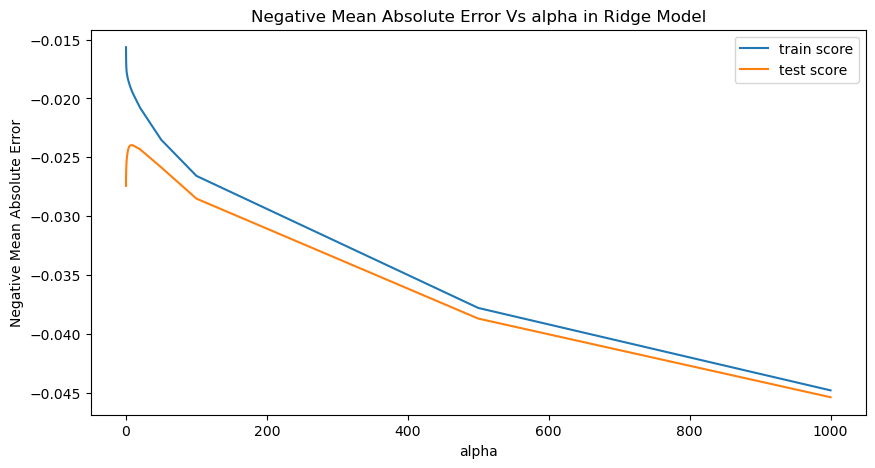

In [100]:
# plotting neg mean absolute error against Alpha 
plt.figure(figsize=(10,5))
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error Vs alpha in Ridge Model")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [101]:
# fitting Ridge model for alpha = 8.0 and checking the co-efficients 

ridreg = Ridge(alpha = 8.0)
ridreg.fit(X_train,y_train)
print(ridreg.intercept_)
print(ridreg.coef_)


0.03523128559570202
[ 9.05251975e-03  2.54516531e-02  7.53040092e-03  3.95464944e-02
  9.09034418e-03  4.59232826e-02  5.29613146e-02  5.83239544e-02
  5.08794723e-02  7.21099561e-03  2.75495989e-02  9.00840805e-03
 -1.05944036e-03  1.55503556e-02  1.62079844e-02  2.25498175e-02
  1.83871549e-02  8.39497015e-03  4.86767580e-03 -2.56694466e-03
 -2.38107127e-02 -4.91122071e-03 -3.90659133e-03  3.54266443e-04
  3.10607615e-03  1.46145101e-04  2.31838513e-03  5.77889974e-03
  5.21776120e-04 -4.58811512e-03 -4.81178109e-03 -1.13195745e-02
 -6.93547088e-03 -2.46691627e-03 -2.32709349e-03 -1.08944694e-02
  7.99042908e-03  7.19042665e-03  8.20020648e-03  6.03279510e-03
 -1.46654412e-03 -1.00512709e-03  5.54612713e-03  3.15803395e-03
 -1.13312033e-02  4.90935348e-04  1.30274358e-02  9.43855911e-03
  1.55407991e-02 -3.63949969e-03  1.09388309e-02 -1.10280981e-02
 -3.36345214e-05 -1.78586740e-03  7.20696209e-03  6.31128996e-03
 -3.73624975e-05  6.74566109e-04 -1.03147774e-03  3.84333571e-03
 -6.3

In [102]:
# predicting on train &  test data 
y_train_pred = ridreg.predict(X_train)

y_test_pred  = ridreg.predict(X_test)

In [103]:
# defining function for finding metrics 
def get_metrics(y_train_pred,y_test_pred):
# Calculating R2 score  
    reg_metrics = []

# R2 score for train 
    train_r2_score =  r2_score(y_train,y_train_pred)
    print('R2 Score of Train Data:',train_r2_score)
    reg_metrics.append(train_r2_score)

# R2 score for test 
    test_r2_score =  r2_score(y_test,y_test_pred)
    print('R2 Score of Test Data:',test_r2_score)
    reg_metrics.append(test_r2_score)

# RSS for train 
    train_RSS =  np.sum(np.square(y_train - y_train_pred))
    print('RSS of Train Data:',train_RSS)
    reg_metrics.append(train_RSS)

# RSS for test 
    test_RSS =  np.sum(np.square(y_test - y_test_pred))
    print('RSS of Test Data:',test_RSS)
    reg_metrics.append(test_RSS)

# MSE for train 
    train_MSE =  mean_squared_error(y_train, y_train_pred)
    print('MSE of Train Data:',train_MSE)
    reg_metrics.append(train_MSE)

# MSE for test 
    test_MSE =  mean_squared_error(y_test, y_test_pred)
    print('MSE of Test Data:',test_MSE)
    reg_metrics.append(test_MSE)

    return(reg_metrics)

In [104]:
# generating metrics for Ridge model  with Alpha = 8.0
ridreg_metrics = get_metrics(y_train_pred,y_test_pred)

R2 Score of Train Data: 0.9083887120109406
R2 Score of Test Data: 0.8730474908609414
RSS of Train Data: 1.1274840375104938
RSS of Test Data: 0.6918080042706283
MSE of Train Data: 0.0011042938663178195
MSE of Test Data: 0.0015758724470857136


#### Ridge Regression Assumption Validation 

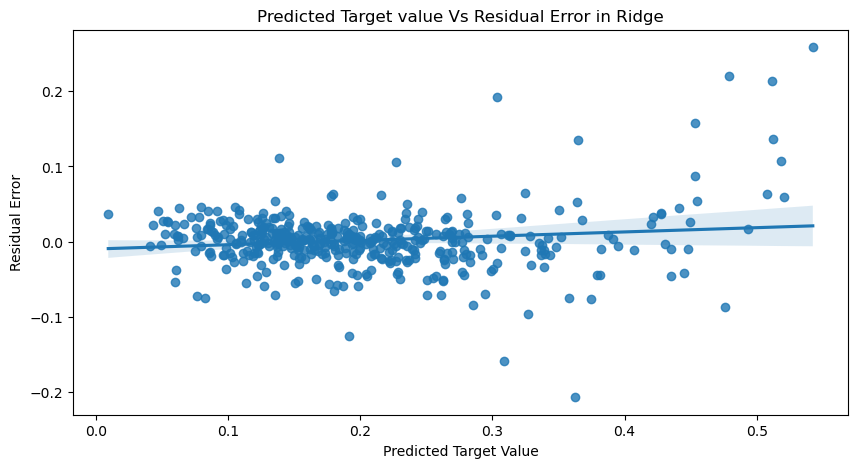

In [105]:
# plotting predicated value against against residual errors
res_errors = y_test - y_test_pred
plt.figure(figsize=(10,5))
sns.regplot(x=y_test_pred , y = res_errors )
plt.xlabel('Predicted Target Value')
plt.ylabel('Residual Error')
plt.title("Predicted Target value Vs Residual Error in Ridge")
plt.show()

#### Validation of Error terms Normality for Ridge Model

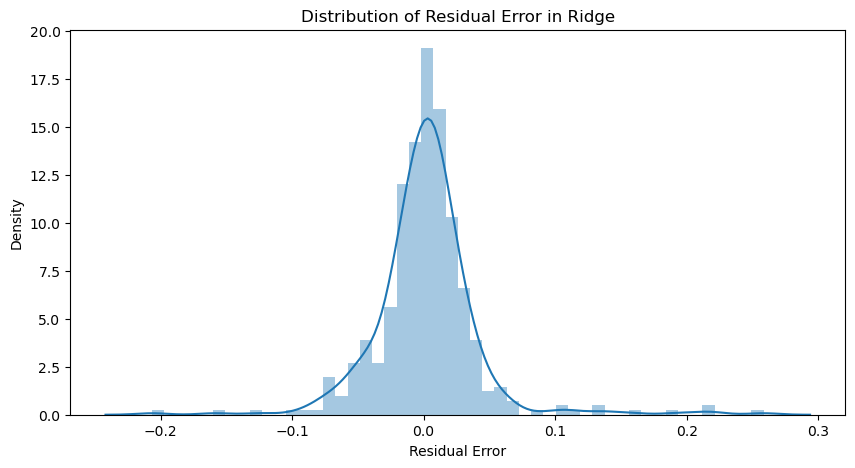

In [106]:
# plotting distribution plot for residual errors

plt.figure(figsize=(10,5))
sns.distplot(res_errors )
plt.xlabel('Residual Error')
plt.title("Distribution of Residual Error in Ridge")
plt.show()

### 4.3 Lasso Regression 

In [107]:
# list of hyperparameter ie aplhas . Same as used in Ridge 
param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Instatntiate 
lasreg = Lasso()

# Cross validation 
# we use 5 folds 
model_cv_lasso = GridSearchCV( estimator = lasreg,
                               param_grid= param,
                               scoring = 'neg_mean_absolute_error',
                               cv = 5,
                               return_train_score = True, 
                               verbose = 1 )

model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# checking the best hyperparameter ie alpha 
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [109]:
# checking the results cross validation 
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.017904      0.001618         0.003034        0.000349      0.0001   
1       0.013598      0.003858         0.003074        0.000703       0.001   
2       0.007273      0.003861         0.000928        0.001154        0.01   
3       0.004517      0.003098         0.003794        0.004953        0.05   
4       0.008267      0.005584         0.001655        0.000970         0.1   
5       0.008376      0.006443         0.001207        0.001507         0.2   
6       0.007325      0.006415         0.001336        0.001103         0.3   
7       0.007441      0.005993         0.003079        0.003826         0.4   
8       0.006386      0.004793         0.003371        0.003466         0.5   
9       0.006040      0.004645         0.001877        0.001670         0.6   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.020114          -0.024036          -0.026897   
1   {'alpha': 0.001}          -0.022650          -0.030680          -0.028104   
2    {'alpha': 0.01}          -0.049007          -0.057648          -0.051374   
3    {'alpha': 0.05}          -0.080067          -0.083171          -0.077650   
4     {'alpha': 0.1}          -0.080067          -0.083171          -0.077650   
5     {'alpha': 0.2}          -0.080067          -0.083171          -0.077650   
6     {'alpha': 0.3}          -0.080067          -0.083171          -0.077650   
7     {'alpha': 0.4}          -0.080067          -0.083171          -0.077650   
8     {'alpha': 0.5}          -0.080067          -0.083171          -0.077650   
9     {'alpha': 0.6}          -0.080067          -0.083171          -0.077650   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.022112          -0.023403        -0.023313        0.002238   
1          -0.024752          -0.027085        -0.026654        0.002762   
2          -0.046080          -0.056126        -0.052047        0.004320   
3          -0.075051          -0.084132        -0.080014        0.003381   
4          -0.075051          -0.084132        -0.080014        0.003381   
5          -0.075051          -0.084132        -0.080014        0.003381   
6          -0.075051          -0.084132        -0.080014        0.003381   
7          -0.075051          -0.084132        -0.080014        0.003381   
8          -0.075051          -0.084132        -0.080014        0.003381   
9          -0.075051          -0.084132        -0.080014        0.003381   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.018956           -0.017688   
1                2           -0.025380           -0.023865   
2                3           -0.051929           -0.051096   
3                4           -0.080533           -0.078553   
4                4           -0.080533           -0.078553   
5                4           -0.080533           -0.078553   
6                4           -0.080533           -0.078553   
7                4           -0.080533           -0.078553   
8                4           -0.080533           -0.078553   
9                4           -0.080533           -0.078553   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.018321           -0.018933           -0.018716   
1           -0.023932           -0.024996           -0.025268   
2           -0.052254           -0.051522           -0.051627   
3           -0.080507           -0.080814           -0.079252   
4           -0.080507           -0.080814           -0.079252   
5           -0.080507           -0.080814           -0.079252   
6           -0.080507           -0.080814           -0.079252   
7           -0.080507           -0.080814           -0.079252   
8           -0.080507           -0.080814           -0.079252   
9           -0.080507           -0.080814           -0.079252   

   me

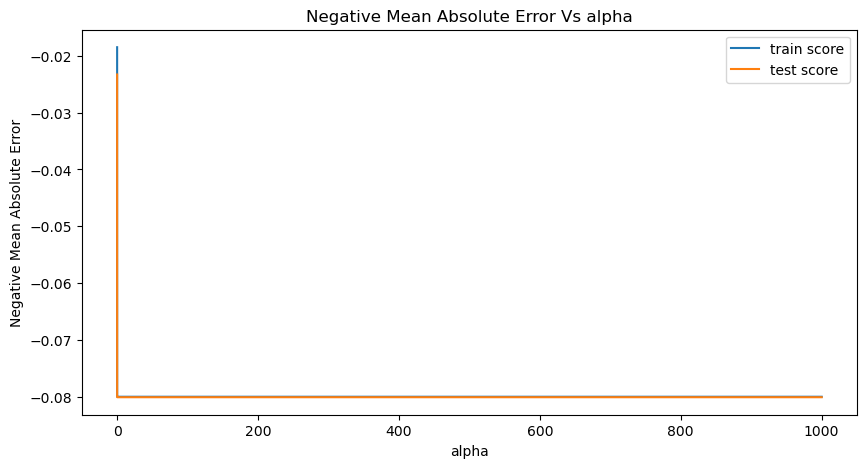

In [110]:
# plotting neg mean absolute error against Alpha 
plt.figure(figsize=(10,5))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error Vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [111]:
# fitting Lasso model for alpha = 0.0001 and checking the co-efficients 

lasreg = Lasso(alpha = 0.0001)
lasreg.fit(X_train,y_train)
print(lasreg.intercept_)
print(lasreg.coef_)


0.007078929698380282
[ 3.91866999e-03  2.78184818e-02  1.36353092e-03  3.99224798e-02
 -0.00000000e+00  6.59687896e-02  1.22489012e-01  1.52085285e-01
  0.00000000e+00  5.99050995e-03  1.23418089e-02  0.00000000e+00
 -7.59036538e-03 -0.00000000e+00  4.19952404e-03  3.02829371e-02
  0.00000000e+00  3.83401006e-03  2.70373081e-03 -1.47228301e-03
 -5.37434896e-02 -1.95427302e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.03238407e-02
 -3.14829835e-03 -0.00000000e+00 -0.00000000e+00 -1.79825914e-02
  0.00000000e+00  0.00000000e+00  4.00693898e-03 -0.00000000e+00
 -0.00000000e+00 -8.03092252e-04  0.00000000e+00  3.77990044e-04
 -1.75112764e-02  0.00000000e+00  2.57522585e-03  3.29901725e-03
  8.67418561e-03 -0.00000000e+00  8.73964848e-03 -6.93246356e-03
 -0.00000000e+00 -0.00000000e+00  2.39722953e-03  9.57150304e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.31215652e-03
 -7.

In [112]:
# predicting on train &  test data 
y_train_pred = lasreg.predict(X_train)

y_test_pred  = lasreg.predict(X_test)

In [113]:
# generating metrics for Lasso model  with Alpha = 0.0001
lasreg_metrics = get_metrics(y_train_pred,y_test_pred)

R2 Score of Train Data: 0.9238477398229037
R2 Score of Test Data: 0.8666545711015992
RSS of Train Data: 0.937225746463427
RSS of Test Data: 0.7266452287584746
MSE of Train Data: 0.0009179488212178521
MSE of Test Data: 0.0016552283115227212


#### Lasso Regression Assumption Validation 

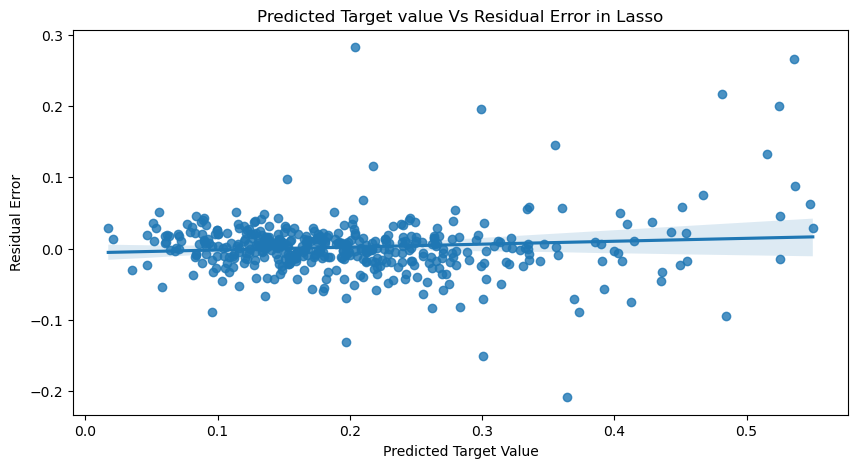

In [114]:
# plotting predicated value against against residual errors
res_errors = y_test - y_test_pred
plt.figure(figsize=(10,5))
sns.regplot(x=y_test_pred , y = res_errors )
plt.xlabel('Predicted Target Value')
plt.ylabel('Residual Error')
plt.title("Predicted Target value Vs Residual Error in Lasso")
plt.show()

#### Validation of Error terms Normality 

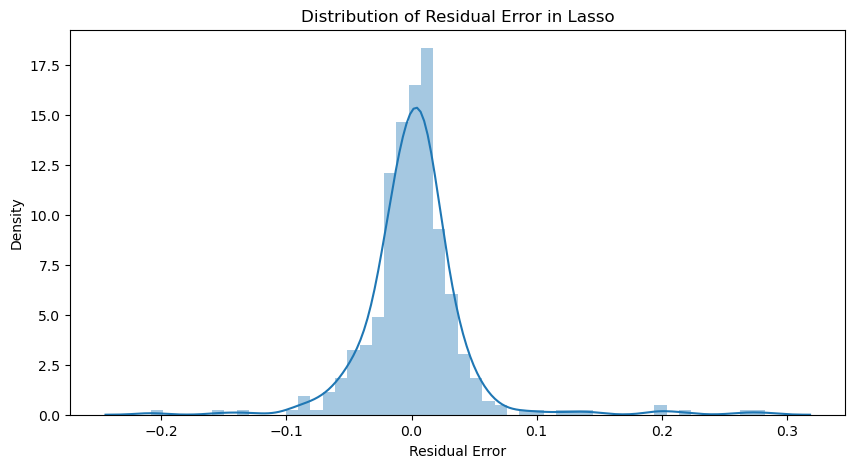

In [115]:
# plotting distribution plot for residual errors

plt.figure(figsize=(10,5))
sns.distplot(res_errors )
plt.xlabel('Residual Error')
plt.title("Distribution of Residual Error in Lasso")
plt.show()

Observation  in Lasso Model :

1. The regression plot of residual errors does not show up any patterns 
2. Error terms are normally distributed with mean at 0.0

In [116]:
# Creating a table which contain all the metrics from Linear, Ridge and Lasso Model

reg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': linreg_metrics , 'Ridge Regression(alpha = 8.0)': ridreg_metrics , 'Lasso Regression(alpha = 0.0001)' : lasreg_metrics 
        }

modelling_metric = pd.DataFrame(reg_table ,columns = ['Metric', 'Linear Regression','Ridge Regression(alpha = 8.0)', 'Lasso Regression(alpha = 0.0001)'] )

modelling_metric

Metric  Linear Regression  Ridge Regression(alpha = 8.0)  \
0  R2 Score (Train)       7.922386e-01                       0.908389   
1   R2 Score (Test)      -2.148804e+21                       0.873047   
2       RSS (Train)       2.556974e+00                       1.127484   
3        RSS (Test)       1.170957e+22                       0.691808   
4       MSE (Train)       2.504382e-03                       0.001104   
5        MSE (Test)       2.667328e+19                       0.001576   

   Lasso Regression(alpha = 0.0001)  
0                          0.923848  
1                          0.866655  
2                          0.937226  
3                          0.726645  
4                          0.000918  
5                          0.001655

Comparing Ridge & Lasso Model Coefficients 

In [117]:
model_coefficients = pd.DataFrame(index=[X_train.columns ])
model_coefficients.rows = [X_train.columns ]
model_coefficients['Ridge Model (Alpha = 8.0)'] = ridreg.coef_
model_coefficients['Lasso Model (Alpha = 0.0001)'] = lasreg.coef_

In [118]:
model_coefficients

Ridge Model (Alpha = 8.0)  Lasso Model (Alpha = 0.0001)
LotFrontage                             0.009053                      0.003919
LotArea                                 0.025452                      0.027818
MasVnrArea                              0.007530                      0.001364
BsmtFinSF1                              0.039546                      0.039922
BsmtUnfSF                               0.009090                     -0.000000
...                                          ...                           ...
SaleCondition_Alloca                    0.009414                      0.000000
SaleCondition_Family                   -0.008084                     -0.001145
SaleCondition_Normal                    0.004980                      0.005508
SaleCondition_Partial                   0.008542                      0.004630
RemodAdd_Done_Yes                       0.007417                      0.006944

[274 rows x 2 columns]

In [119]:
# top oc-efficients from Lasso 
model_coefficients.sort_values(by='Lasso Model (Alpha = 0.0001)', ascending=False).head(5)

Ridge Model (Alpha = 8.0)  Lasso Model (Alpha = 0.0001)
2ndFlrSF                           0.058324                      0.152085
OverallQual_10                     0.058664                      0.135725
1stFlrSF                           0.052961                      0.122489
RoofMatl_WdShngl                   0.041509                      0.090864
OverallQual_9                      0.037453                      0.082921

In [120]:
# Top co-efficients from Ridge
model_coefficients.sort_values(by='Ridge Model (Alpha = 8.0)', ascending=False).head(5)

Ridge Model (Alpha = 8.0)  Lasso Model (Alpha = 0.0001)
OverallQual_10                         0.058664                      0.135725
2ndFlrSF                               0.058324                      0.152085
1stFlrSF                               0.052961                      0.122489
GrLivArea                              0.050879                      0.000000
Neighborhood_NoRidge                   0.045973                      0.046405

#### Model Evaluation 

In [121]:
modelling_metric

Metric  Linear Regression  Ridge Regression(alpha = 8.0)  \
0  R2 Score (Train)       7.922386e-01                       0.908389   
1   R2 Score (Test)      -2.148804e+21                       0.873047   
2       RSS (Train)       2.556974e+00                       1.127484   
3        RSS (Test)       1.170957e+22                       0.691808   
4       MSE (Train)       2.504382e-03                       0.001104   
5        MSE (Test)       2.667328e+19                       0.001576   

   Lasso Regression(alpha = 0.0001)  
0                          0.923848  
1                          0.866655  
2                          0.937226  
3                          0.726645  
4                          0.000918  
5                          0.001655

In [122]:
# checking no of non-zero coefficients for Lasso 
model_coefficients[model_coefficients['Lasso Model (Alpha = 0.0001)'] != 0.0].shape

(129, 2)

In [123]:
# checking no of non-zero coefficients for Ridge 
model_coefficients[model_coefficients['Ridge Model (Alpha = 8.0)'] != 0.0].shape

(270, 2)

#### 5. Observation & Conclusions:

1.  Ridge - Alpha : *8.0* .
2.  Lasso - Alpha : *0.0001* .
3.  Lasso R2 train score is higher than Ridge but Ridge R2 test score is better. 
4.  RSS(test) is better for Ridge.
5.  Lasso has 129 non-zero beta co-efficients. 
6.  Ridge has 270 non-zero beta co-efficients.
7.  We choose Lasso Model after looking at all the metrics from above, due to fact that it has less beta making it simpler and R2 score is also reasonably good .

### Problem Statement - Part II - Subjective Q&A

1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [124]:
# Building Ridge model with alpha = 16.0 

ridreg_new = Ridge(alpha = 16.0)
ridreg_new.fit(X_train,y_train)

# predicting on train &  test data 
y_train_pred_new = ridreg_new.predict(X_train)
y_test_pred_new  = ridreg_new.predict(X_test)

In [125]:
# generating metrics for Ridge model  with Alpha = 16.0
ridreg_new_metrics = get_metrics(y_train_pred_new,y_test_pred_new)

R2 Score of Train Data: 0.8965726397593028
R2 Score of Test Data: 0.8677697924451039
RSS of Train Data: 1.2729075234392528
RSS of Test Data: 0.7205680030525621
MSE of Train Data: 0.0012467262717328626
MSE of Test Data: 0.0016413849727848794


In [126]:
# Building Lasso model with alpha = 0.0002

lasreg_new = Lasso(alpha = 0.0002)
lasreg_new.fit(X_train,y_train)

# predicting on train &  test data 
y_train_pred_new = lasreg_new.predict(X_train)
y_test_pred_new  = lasreg_new.predict(X_test)


In [127]:
# generating metrics for Lasso model  with Alpha = 0.0002
lasreg_new_metrics = get_metrics(y_train_pred_new,y_test_pred_new)

R2 Score of Train Data: 0.9126090201082877
R2 Score of Test Data: 0.8705006408264578
RSS of Train Data: 1.0755436039942294
RSS of Test Data: 0.705686668437893
MSE of Train Data: 0.0010534217473009103
MSE of Test Data: 0.0016074867162594372


In [128]:
# Apending the new metrics to the modelling metrics DF

new_reg_table = {'Ridge Regression(alpha = 16.0)': ridreg_new_metrics , 'Lasso Regression(alpha = 0.0002)' : lasreg_new_metrics         }

new_modelling_metric = pd.DataFrame(new_reg_table ,columns = ['Ridge Regression(alpha = 16.0)', 'Lasso Regression(alpha = 0.0002)'] )

modelling_metric = pd.concat([modelling_metric,new_modelling_metric],axis=1)

In [129]:
# checking metrics 
modelling_metric

Metric  Linear Regression  Ridge Regression(alpha = 8.0)  \
0  R2 Score (Train)       7.922386e-01                       0.908389   
1   R2 Score (Test)      -2.148804e+21                       0.873047   
2       RSS (Train)       2.556974e+00                       1.127484   
3        RSS (Test)       1.170957e+22                       0.691808   
4       MSE (Train)       2.504382e-03                       0.001104   
5        MSE (Test)       2.667328e+19                       0.001576   

   Lasso Regression(alpha = 0.0001)  Ridge Regression(alpha = 16.0)  \
0                          0.923848                        0.896573   
1                          0.866655                        0.867770   
2                          0.937226                        1.272908   
3                          0.726645                        0.720568   
4                          0.000918                        0.001247   
5                          0.001655                        0.001641   

   Lasso Regression(alpha = 0.0002)  
0                          0.912609  
1                          0.870501  
2                          1.075544  
3                          0.705687  
4                          0.001053  
5                          0.001607

In [130]:
modelling_metric.columns


Index(['Metric', 'Linear Regression', 'Ridge Regression(alpha = 8.0)',
       'Lasso Regression(alpha = 0.0001)', 'Ridge Regression(alpha = 16.0)',
       'Lasso Regression(alpha = 0.0002)'],
      dtype='object')

In [131]:
modelling_metric[['Metric','Ridge Regression(alpha = 8.0)' ,'Ridge Regression(alpha = 16.0)']]

Metric  Ridge Regression(alpha = 8.0)  \
0  R2 Score (Train)                       0.908389   
1   R2 Score (Test)                       0.873047   
2       RSS (Train)                       1.127484   
3        RSS (Test)                       0.691808   
4       MSE (Train)                       0.001104   
5        MSE (Test)                       0.001576   

   Ridge Regression(alpha = 16.0)  
0                        0.896573  
1                        0.867770  
2                        1.272908  
3                        0.720568  
4                        0.001247  
5                        0.001641

In [132]:
modelling_metric[['Metric','Lasso Regression(alpha = 0.0001)','Lasso Regression(alpha = 0.0002)']]

Metric  Lasso Regression(alpha = 0.0001)  \
0  R2 Score (Train)                          0.923848   
1   R2 Score (Test)                          0.866655   
2       RSS (Train)                          0.937226   
3        RSS (Test)                          0.726645   
4       MSE (Train)                          0.000918   
5        MSE (Test)                          0.001655   

   Lasso Regression(alpha = 0.0002)  
0                          0.912609  
1                          0.870501  
2                          1.075544  
3                          0.705687  
4                          0.001053  
5                          0.001607

In [133]:
# Checking the beta co-efficients with new alpha values for Ridge and Lasso Model

model_coefficients['Ridge Model (Alpha = 16.0)'] = ridreg_new.coef_
model_coefficients['Lasso Model (Alpha = 0.0002)'] = lasreg_new.coef_
model_coefficients.head(20)

Ridge Model (Alpha = 8.0)  Lasso Model (Alpha = 0.0001)  \
LotFrontage                    0.009053                      0.003919   
LotArea                        0.025452                      0.027818   
MasVnrArea                     0.007530                      0.001364   
BsmtFinSF1                     0.039546                      0.039922   
BsmtUnfSF                      0.009090                     -0.000000   
TotalBsmtSF                    0.045923                      0.065969   
1stFlrSF                       0.052961                      0.122489   
2ndFlrSF                       0.058324                      0.152085   
GrLivArea                      0.050879                      0.000000   
BsmtFullBath                   0.007211                      0.005991   
FullBath                       0.027550                      0.012342   
HalfBath                       0.009008                      0.000000   
BedroomAbvGr                  -0.001059                     -0.007590   
TotRmsAbvGrd                   0.015550                     -0.000000   
Fireplaces                     0.016208                      0.004200   
GarageCars                     0.022550                      0.030283   
GarageArea                     0.018387                      0.000000   
WoodDeckSF                     0.008395                      0.003834   
OpenPorchSF                    0.004868                      0.002704   
MoSold                        -0.002567                     -0.001472   

              Ridge Model (Alpha = 16.0)  Lasso Model (Alpha = 0.0002)  
LotFrontage                     0.010604                      0.003088  
LotArea                         0.024461                      0.028634  
MasVnrArea                      0.010549                      0.000000  
BsmtFinSF1                      0.035302                      0.039190  
BsmtUnfSF                       0.009816                     -0.000000  
TotalBsmtSF                     0.040793                      0.068380  
1stFlrSF                        0.045905                      0.121325  
2ndFlrSF                        0.041583                      0.135917  
GrLivArea                       0.046348                      0.000000  
BsmtFullBath                    0.007289                      0.001661  
FullBath                        0.025189                      0.004481  
HalfBath                        0.010701                      0.000000  
BedroomAbvGr                    0.001673                     -0.000000  
TotRmsAbvGrd                    0.019700                     -0.000000  
Fireplaces                      0.015917                      0.006451  
GarageCars                      0.020847                      0.028384  
GarageArea                      0.020550                      0.003630  
WoodDeckSF                      0.009756                      0.004428  
OpenPorchSF                     0.006262                      0.001789  
MoSold                         -0.002430                     -0.000000

In [134]:
model_coefficients[model_coefficients['Lasso Model (Alpha = 0.0001)'] != 0.0].shape

(129, 4)

In [135]:
model_coefficients[model_coefficients['Lasso Model (Alpha = 0.0002)'] != 0.0].shape

(100, 4)

In [136]:
model_coefficients[model_coefficients['Ridge Model (Alpha = 8.0)'] != 0.0].shape

(270, 4)

In [137]:
model_coefficients[model_coefficients['Ridge Model (Alpha = 16.0)'] != 0.0].shape

(270, 4)

In [138]:
# 10 Most important pedictors for alpha = 16.0 for Ridge Models are :
model_coefficients.sort_values(by='Ridge Model (Alpha = 16.0)', ascending=False).head(10)['Ridge Model (Alpha = 16.0)']

GrLivArea               0.046348
1stFlrSF                0.045905
OverallQual_10          0.045033
2ndFlrSF                0.041583
TotalBsmtSF             0.040793
Neighborhood_NoRidge    0.039809
BsmtFinSF1              0.035302
OverallQual_9           0.031961
RoofMatl_WdShngl        0.026595
FullBath                0.025189
Name: Ridge Model (Alpha = 16.0), dtype: float64

In [139]:
# 10 Most important pedictors for alpha = 0.0002 for Lasso Models are :
model_coefficients.sort_values(by='Lasso Model (Alpha = 0.0002)', ascending=False).head(10)['Lasso Model (Alpha = 0.0002)']

2ndFlrSF                0.135917
OverallQual_10          0.121826
1stFlrSF                0.121325
OverallQual_9           0.079660
TotalBsmtSF             0.068380
RoofMatl_WdShngl        0.057101
Neighborhood_NoRidge    0.047780
BsmtFinSF1              0.039190
OverallQual_8           0.033667
LotArea                 0.028634
Name: Lasso Model (Alpha = 0.0002), dtype: float64

In [140]:
model_coefficients.sort_values(by='Lasso Model (Alpha = 0.0002)', ascending=False).head(10)

Ridge Model (Alpha = 8.0)  Lasso Model (Alpha = 0.0001)  \
2ndFlrSF                               0.058324                      0.152085   
OverallQual_10                         0.058664                      0.135725   
1stFlrSF                               0.052961                      0.122489   
OverallQual_9                          0.037453                      0.082921   
TotalBsmtSF                            0.045923                      0.065969   
RoofMatl_WdShngl                       0.041509                      0.090864   
Neighborhood_NoRidge                   0.045973                      0.046405   
BsmtFinSF1                             0.039546                      0.039922   
OverallQual_8                          0.009731                      0.037127   
LotArea                                0.025452                      0.027818   

                      Ridge Model (Alpha = 16.0)  Lasso Model (Alpha = 0.0002)  
2ndFlrSF                                0.041583                      0.135917  
OverallQual_10                          0.045033                      0.121826  
1stFlrSF                                0.045905                      0.121325  
OverallQual_9                           0.031961                      0.079660  
TotalBsmtSF                             0.040793                      0.068380  
RoofMatl_WdShngl                        0.026595                      0.057101  
Neighborhood_NoRidge                    0.039809                      0.047780  
BsmtFinSF1                              0.035302                      0.039190  
OverallQual_8                           0.011302                      0.033667  
LotArea                                 0.024461                      0.028634

Question 2

You have determined the optimal value of lambda/alpha for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [141]:
model_coefficients.shape

(274, 4)

In [142]:
model_coefficients[model_coefficients['Lasso Model (Alpha = 0.0001)'] != 0.0].shape

(129, 4)

In [143]:
model_coefficients[model_coefficients['Ridge Model (Alpha = 8.0)'] != 0.0].shape

(270, 4)

Observation :
1. Lasso model has eleminated 145 features 
2. Ridge model has 4 features equal or close to zero 

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [144]:
# top oc-efficients from Lasso for alpha = 0.0001
model_coefficients.sort_values(by='Lasso Model (Alpha = 0.0001)', ascending=False).head(5)

Ridge Model (Alpha = 8.0)  Lasso Model (Alpha = 0.0001)  \
2ndFlrSF                           0.058324                      0.152085   
OverallQual_10                     0.058664                      0.135725   
1stFlrSF                           0.052961                      0.122489   
RoofMatl_WdShngl                   0.041509                      0.090864   
OverallQual_9                      0.037453                      0.082921   

                  Ridge Model (Alpha = 16.0)  Lasso Model (Alpha = 0.0002)  
2ndFlrSF                            0.041583                      0.135917  
OverallQual_10                      0.045033                      0.121826  
1stFlrSF                            0.045905                      0.121325  
RoofMatl_WdShngl                    0.026595                      0.057101  
OverallQual_9                       0.031961                      0.079660

In [145]:
X_train[['2ndFlrSF','OverallQual_10','1stFlrSF','RoofMatl_WdShngl','OverallQual_9']].head()

2ndFlrSF  OverallQual_10  1stFlrSF  RoofMatl_WdShngl  OverallQual_9
318   0.700000               0  0.560813                 0              0
239   0.378571               0  0.238906                 0              0
986   0.348352               0  0.352751                 0              0
1416  0.573626               0  0.490151                 0              0
390   0.223077               0  0.330319                 0              0

In [146]:
X_train_new = X_train.drop(['2ndFlrSF','OverallQual_10','1stFlrSF','RoofMatl_WdShngl','OverallQual_9'],axis=1)

In [147]:
X_train_new.shape

(1021, 269)

In [148]:
X_test_new = X_test.drop(['2ndFlrSF','OverallQual_10','1stFlrSF','RoofMatl_WdShngl','OverallQual_9'],axis=1)

In [149]:
X_test_new.shape

(439, 269)

In [150]:
# Re-building Lasso Model after dropping 5 features with Alpha = 0.0001
lasreg_new = Lasso(alpha = 0.0001)
lasreg_new.fit(X_train_new,y_train)

# predicting on train &  test data 
y_train_pred_new = lasreg_new.predict(X_train_new)
y_test_pred_new  = lasreg_new.predict(X_test_new)


In [151]:
new_model_coeff = pd.DataFrame(index=X_test_new.columns)
new_model_coeff.rows = X_test_new.columns
new_model_coeff['Lasso'] = lasreg_new.coef_
new_model_coeff.sort_values(by='Lasso', ascending=False).head(5)

Lasso
GrLivArea             0.144790
TotalBsmtSF           0.083048
Neighborhood_NoRidge  0.062446
OverallCond_9         0.052622
BsmtFinSF1            0.041239

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?